<a href="https://colab.research.google.com/github/ibrahimmhammed/Learning_projects/blob/main/IMDB_movie_rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, mean_absolute_error
from sklearn import metrics

# Reading Files

In [ ]:
df = pd.read_csv("//content//movie_metadata.csv")

# Data Exploration

In [ ]:
df.head()


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
df.shape

(5043, 28)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [ ]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [ ]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [ ]:
df.describe(include= "O") #describe for categorical data

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
count,5024,4939,5030,5043,5036,5043,5020,4890,5043,5031,5038,4740
unique,2,2398,3032,914,2097,4917,3521,4760,4919,47,65,18
top,Color,Steven Spielberg,Morgan Freeman,Drama,Robert De Niro,Ben-Hur,John Heard,based on novel,http://www.imdb.com/title/tt0232500/?ref_=fn_t...,English,USA,R
freq,4815,26,20,236,49,3,8,4,3,4704,3807,2118


In [ ]:
df.nunique() #unique values in each column

color                           2
director_name                2398
num_critic_for_reviews        528
duration                      191
director_facebook_likes       435
actor_3_facebook_likes        906
actor_2_name                 3032
actor_1_facebook_likes        878
gross                        4035
genres                        914
actor_1_name                 2097
movie_title                  4917
num_voted_users              4826
cast_total_facebook_likes    3978
actor_3_name                 3521
facenumber_in_poster           19
plot_keywords                4760
movie_imdb_link              4919
num_user_for_reviews          954
language                       47
country                        65
content_rating                 18
budget                        439
title_year                     91
actor_2_facebook_likes        917
imdb_score                     78
aspect_ratio                   22
movie_facebook_likes          876
dtype: int64

#Data Analysis

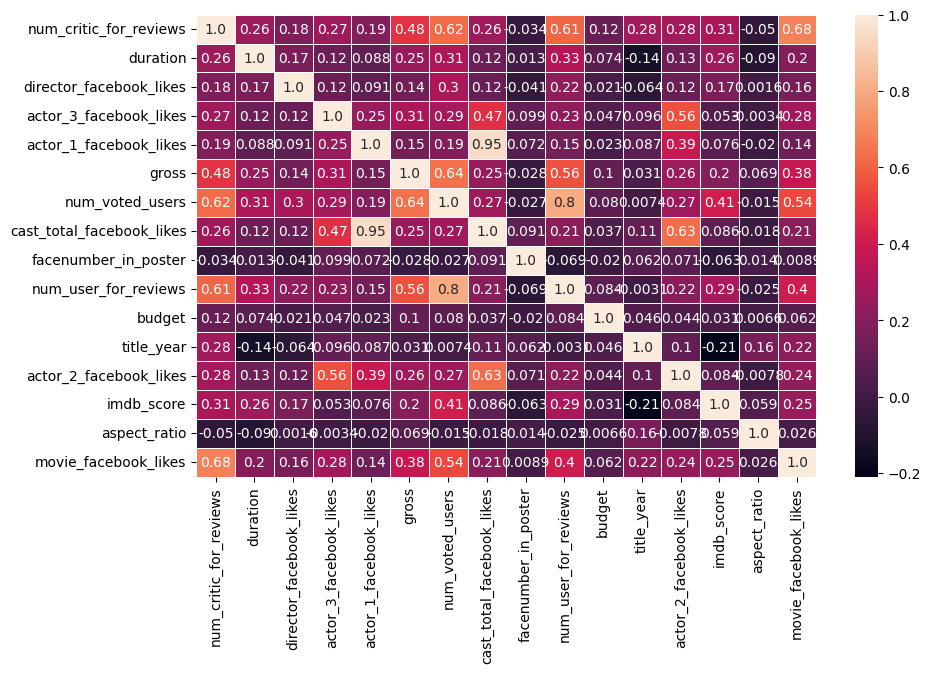

In [ ]:
cor= df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor,fmt=".2",annot=True,linewidths=0.5)
plt.show()
#measuring correlation between all feautures (we focus on imdb_score)


F**rom correlation matrix we notice that (num_critic,num_voted,num_users reviews , duration) have the most impact on imdb_score**

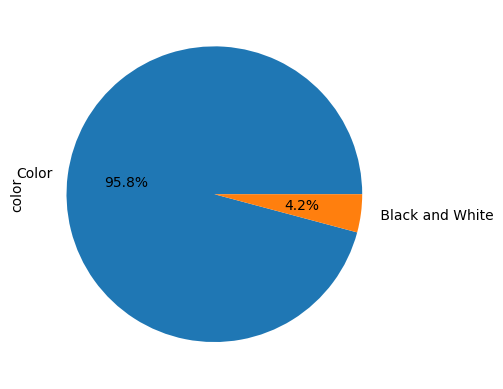

In [ ]:
df['color'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

In [ ]:
top10countries= df['country'].value_counts().nlargest(10)
top10countries

USA          3807
UK            448
France        154
Canada        126
Germany        97
Australia      55
India          34
Spain          33
China          30
Japan          23
Name: country, dtype: int64

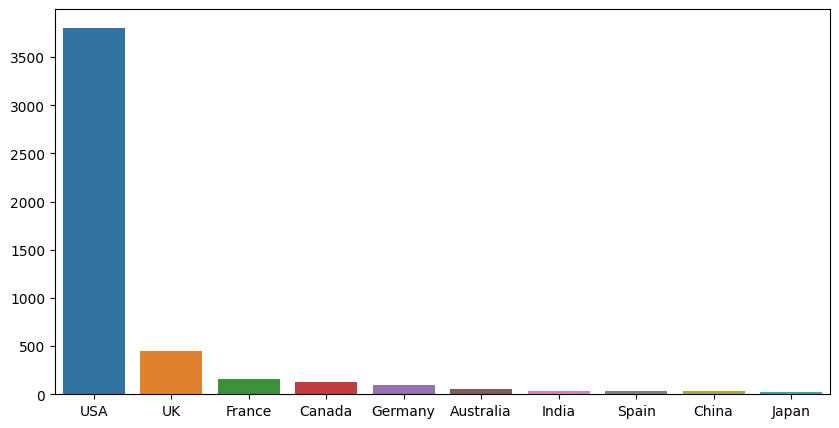

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,
            x= top10countries.index,
            y= top10countries.values  )
plt.show() #visualizing top10 countries

In [ ]:
df['language'].value_counts()

English       4704
French          73
Spanish         40
Hindi           28
Mandarin        26
German          19
Japanese        18
Cantonese       11
Russian         11
Italian         11
Portuguese       8
Korean           8
Arabic           5
Danish           5
Hebrew           5
Swedish          5
Polish           4
Norwegian        4
Persian          4
Dutch            4
Thai             3
Chinese          3
Icelandic        2
None             2
Indonesian       2
Aboriginal       2
Romanian         2
Dari             2
Zulu             2
Panjabi          1
Urdu             1
Vietnamese       1
Slovenian        1
Greek            1
Dzongkha         1
Tamil            1
Telugu           1
Kannada          1
Czech            1
Hungarian        1
Bosnian          1
Filipino         1
Mongolian        1
Maya             1
Aramaic          1
Kazakh           1
Swahili          1
Name: language, dtype: int64

In [ ]:
Arabic_movies= df.movie_title[df.language=="Arabic"]
Arabic_movies
#the Arabic movies in the df

3354    Valley of the Wolves: Iraq 
4348                    The Square 
4393                       Caramel 
4580                         Ajami 
4945          The Brain That Sings 
Name: movie_title, dtype: object

In [ ]:
Arabic_movies_ratings = df.loc[df['language'] == 'Arabic', ['movie_title', 'imdb_score']]
Arabic_movies_ratings


,movie_title,imdb_score
3354,Valley of the Wolves: Iraq,6.0
4348,The Square,8.1
4393,Caramel,7.2
4580,Ajami,7.4
4945,The Brain That Sings,8.2


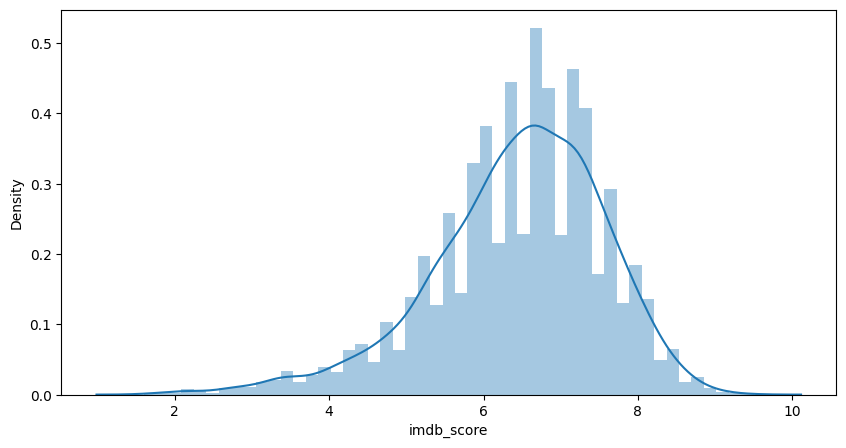

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df['imdb_score'])
plt.show()

#distribution of scores

In [ ]:
top10directors= df['director_name'].value_counts().nlargest(20)
top10directors

Steven Spielberg     26
Woody Allen          22
Clint Eastwood       20
Martin Scorsese      20
Ridley Scott         17
Tim Burton           16
Steven Soderbergh    16
Spike Lee            16
Renny Harlin         15
Oliver Stone         14
Joel Schumacher      13
Michael Bay          13
Robert Rodriguez     13
Barry Levinson       13
Sam Raimi            13
Robert Zemeckis      13
John Carpenter       13
Ron Howard           13
Shawn Levy           12
Kevin Smith          12
Name: director_name, dtype: int64

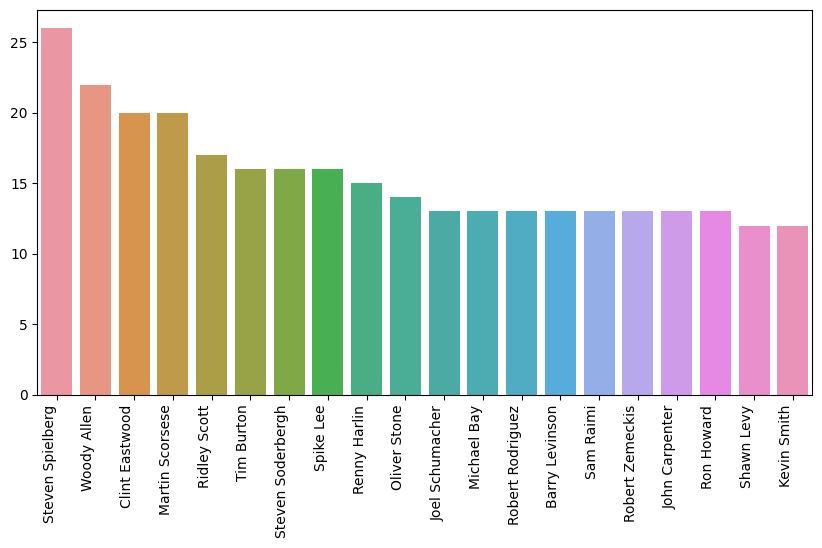

In [ ]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90, ha='right', fontsize=10)
sns.barplot(data=df,
            x=top10directors.index,
            y=top10directors.values)
plt.show()
#visualizing top 20 directors (who has most films in df)

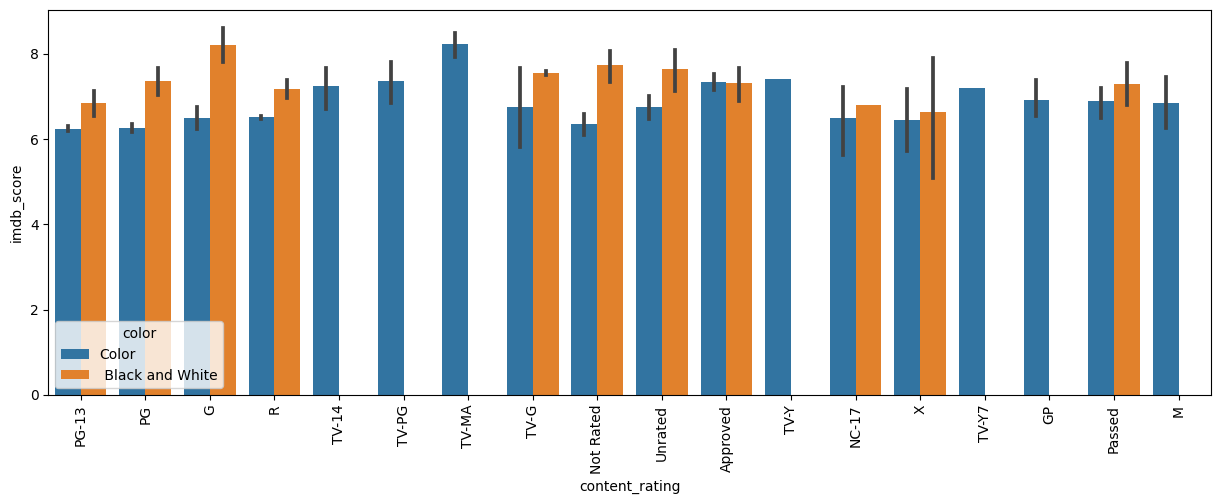

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(x='content_rating',y='imdb_score',hue='color',data=df);
plt.xticks(rotation=90)
plt.show()
# This visualization shows the type of content having higher imdbscore and shows us the type of movie color present in data

**From last chart we found content ratings (GP,TV-14,TV-PG,TV-MA,TV-Y,M) in color movies only**

                                             |          | [  0%]   00:00 -> (? left)


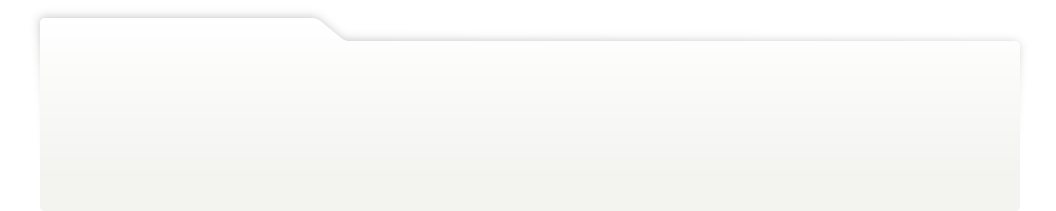
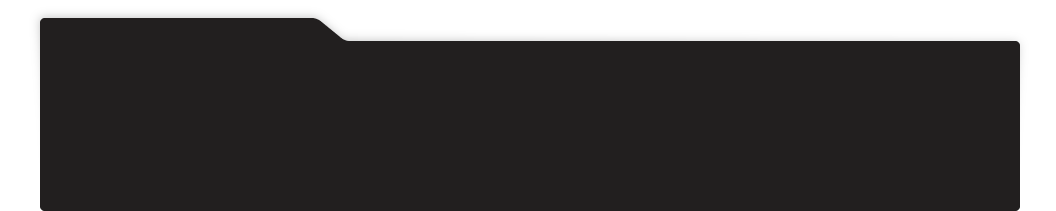
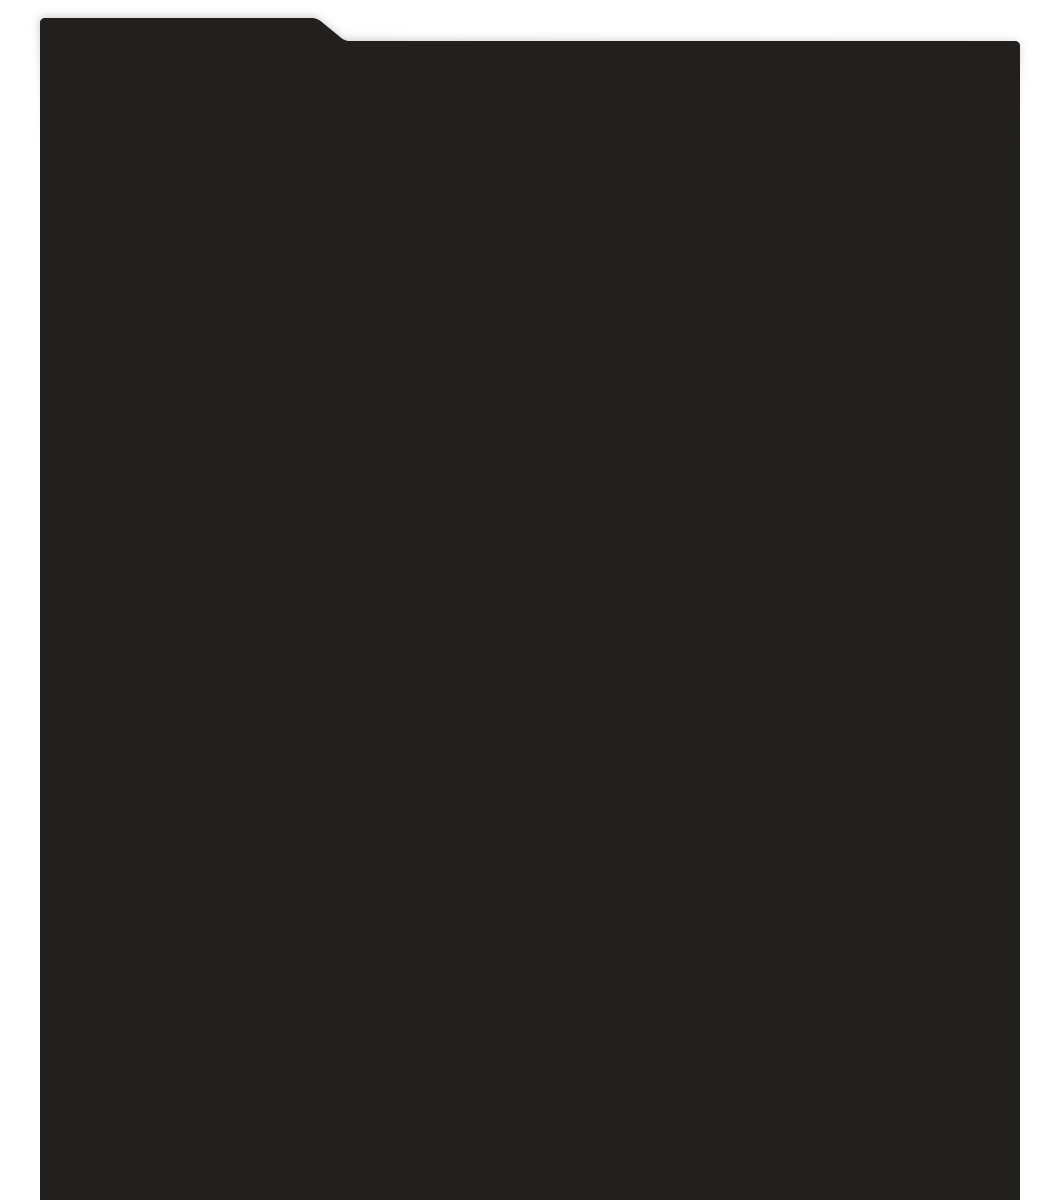
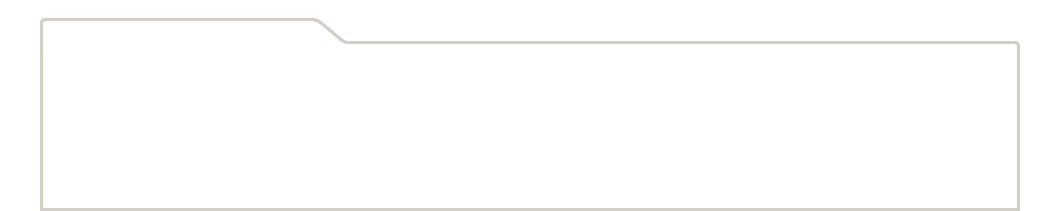
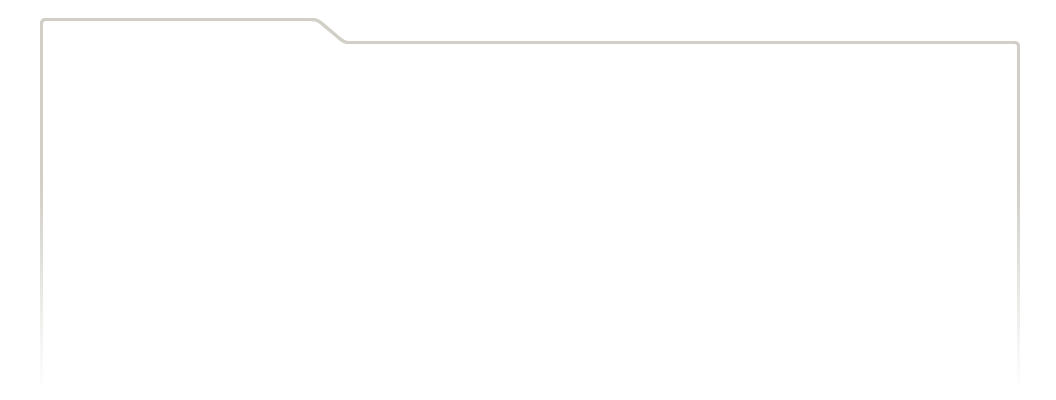
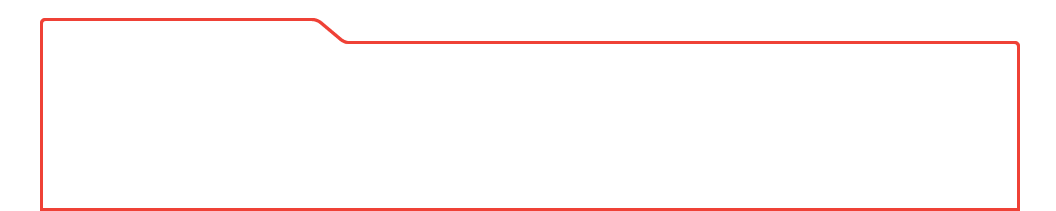
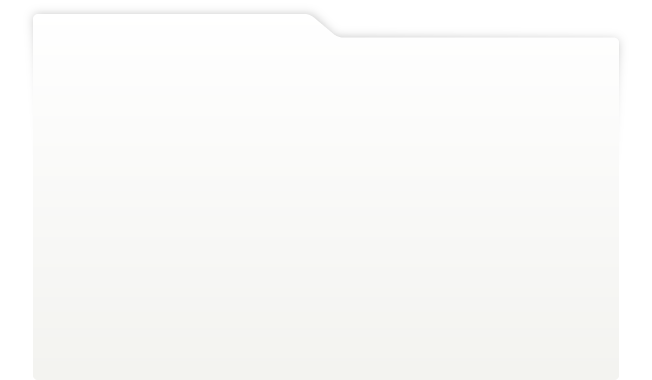
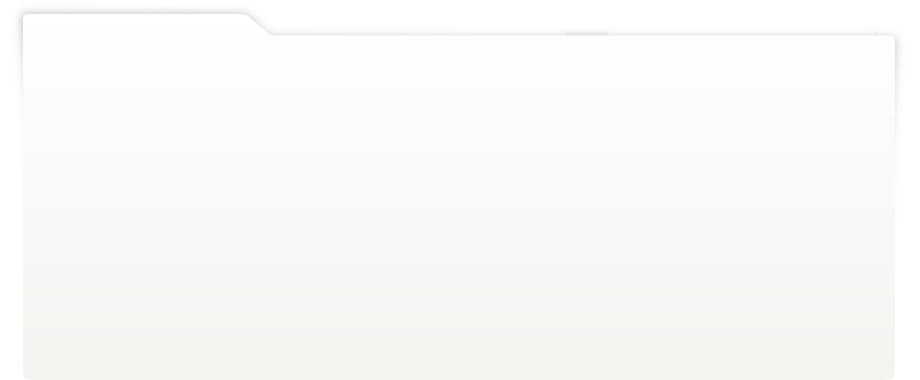
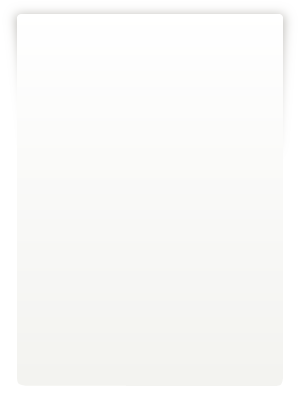
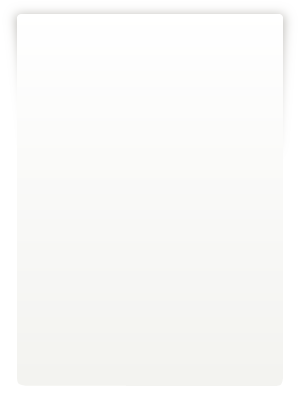
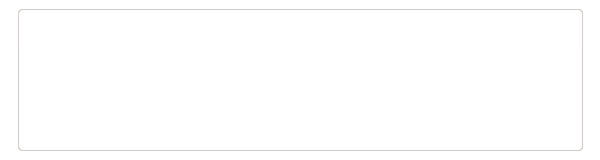
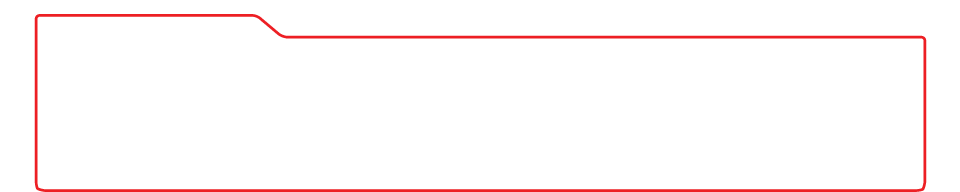
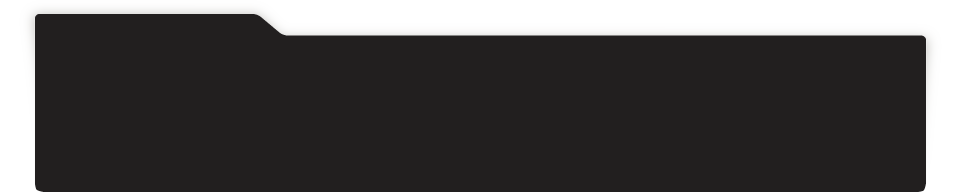
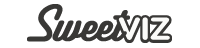
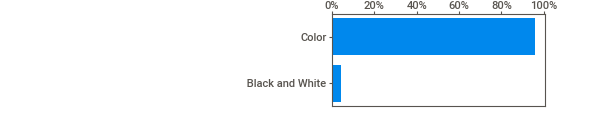
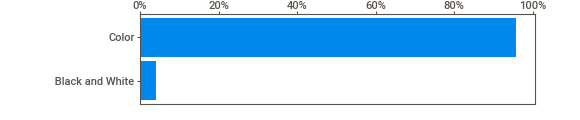
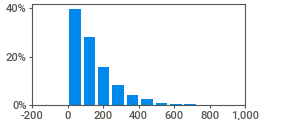
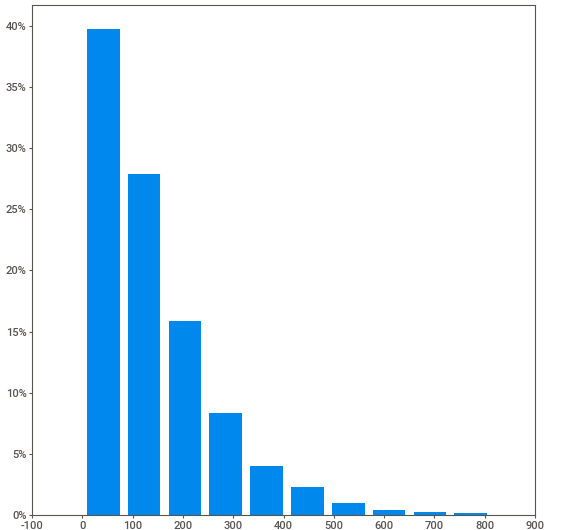
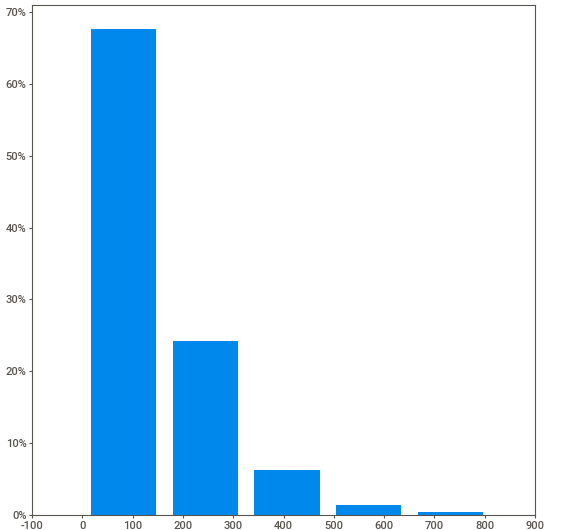
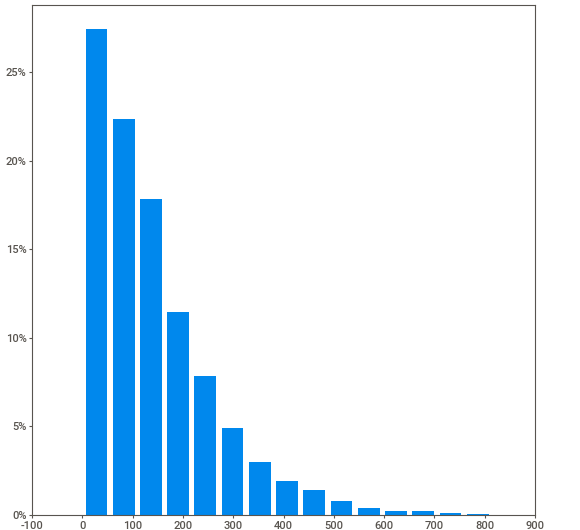
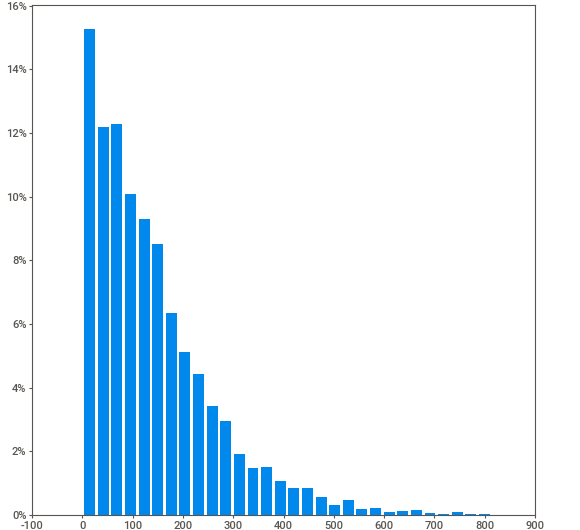
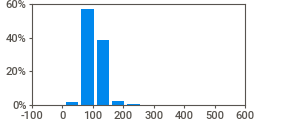
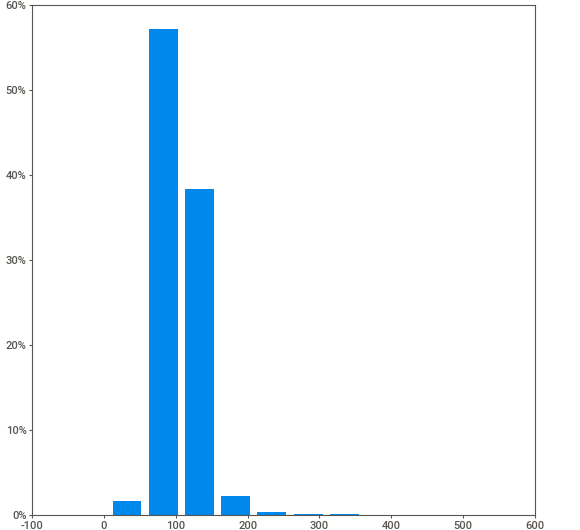
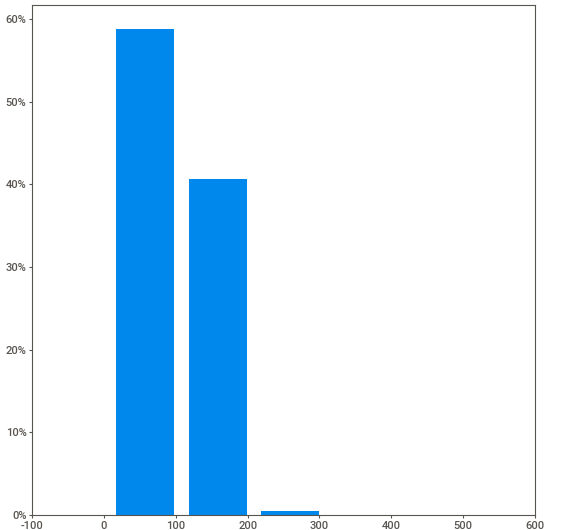
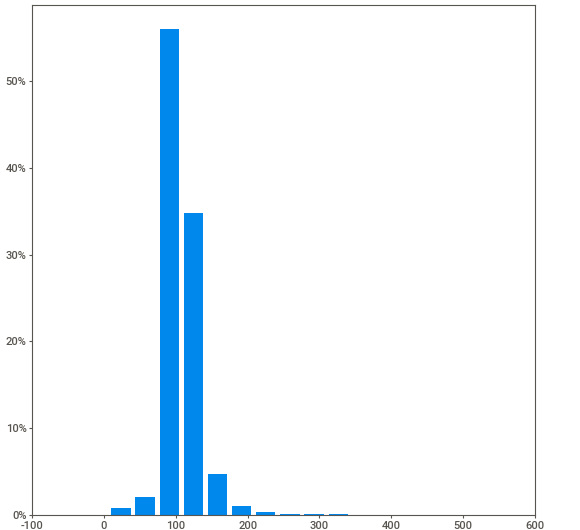
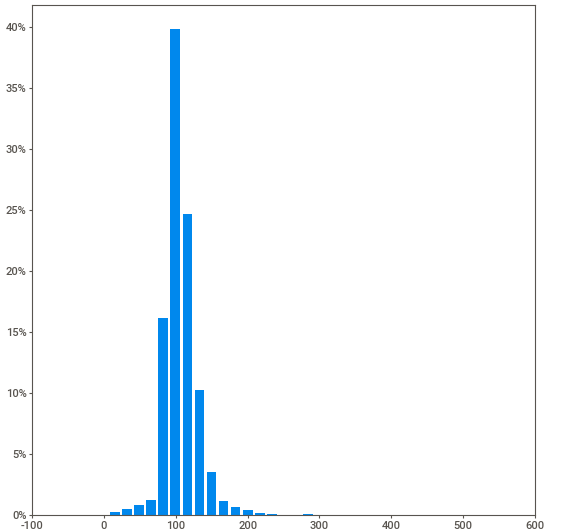
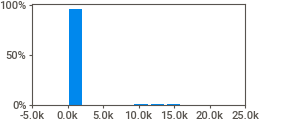
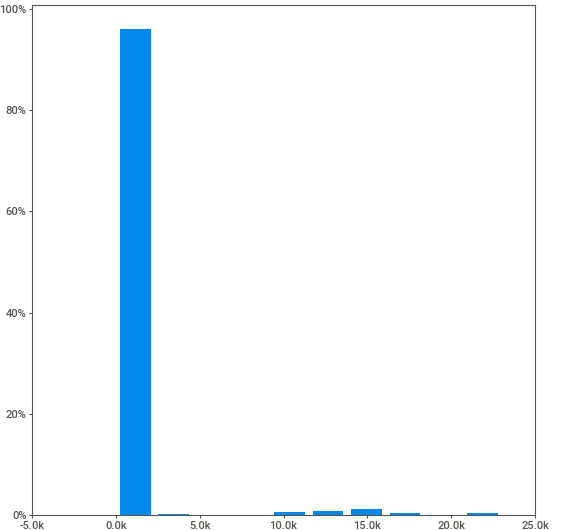
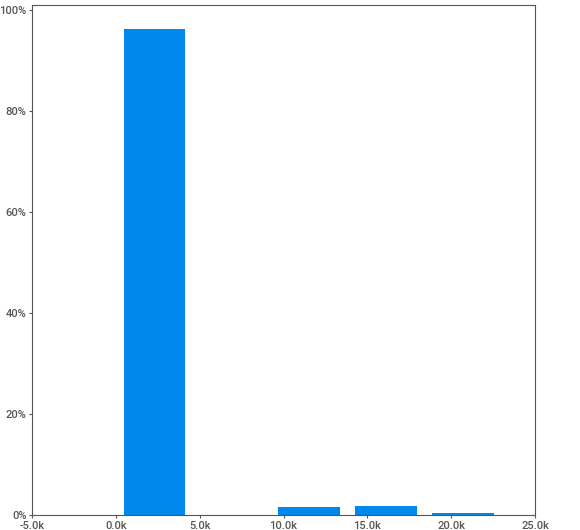
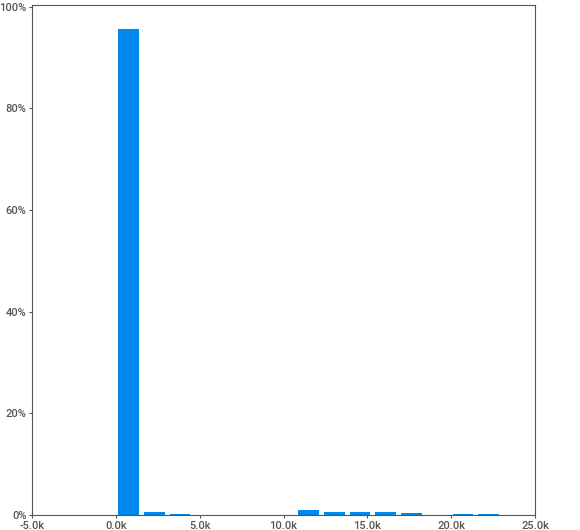
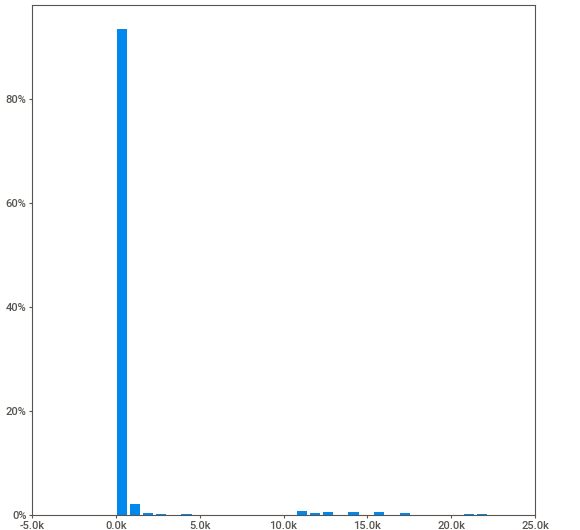
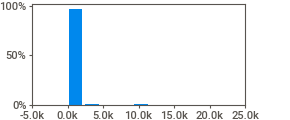
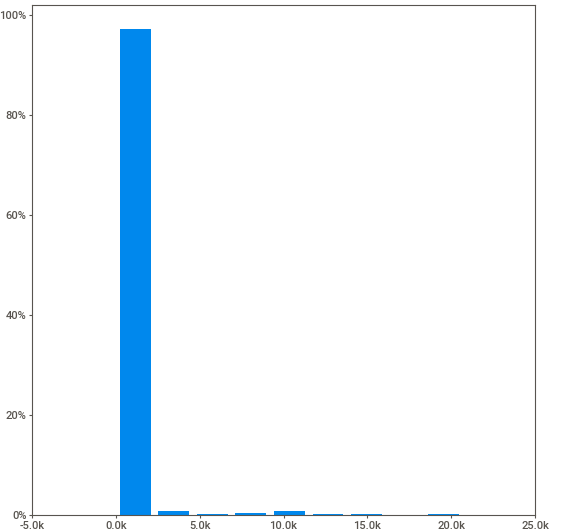
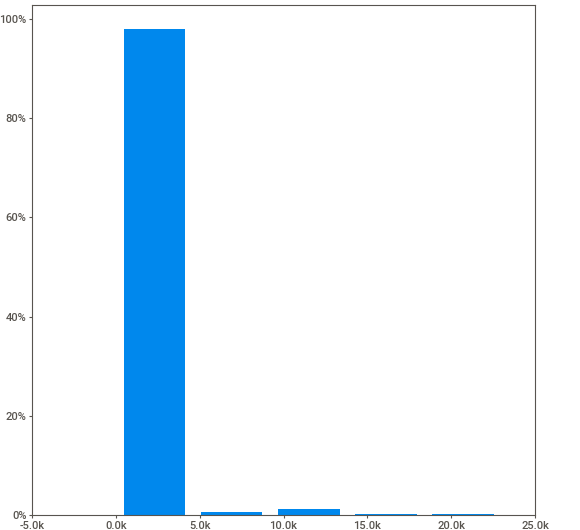
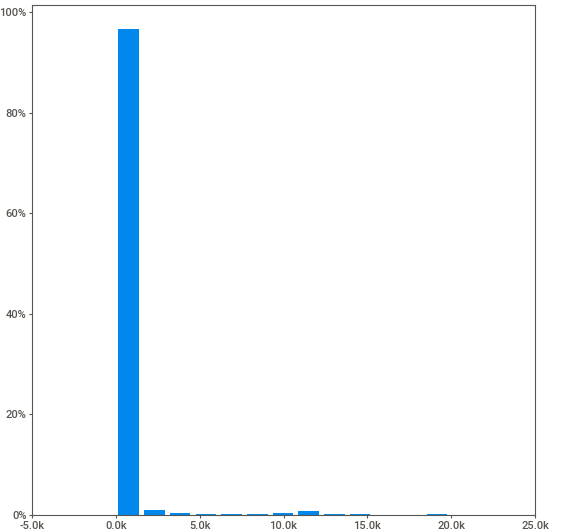
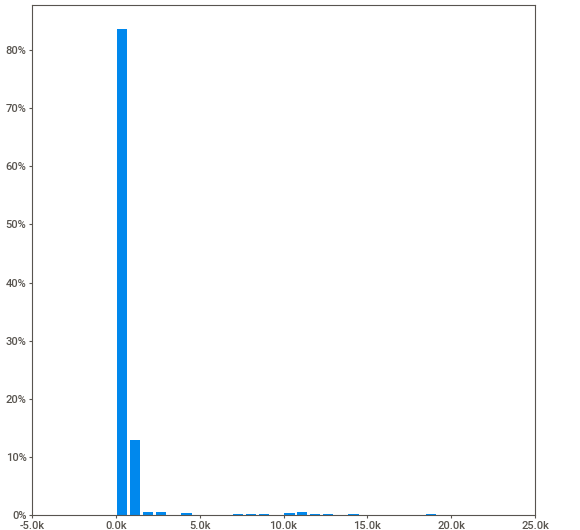
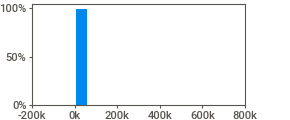
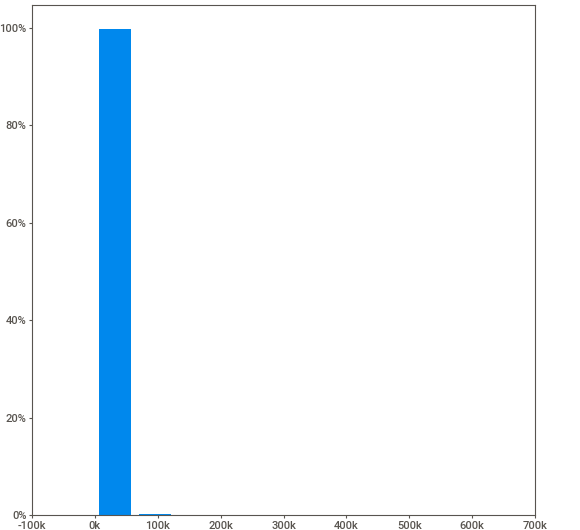
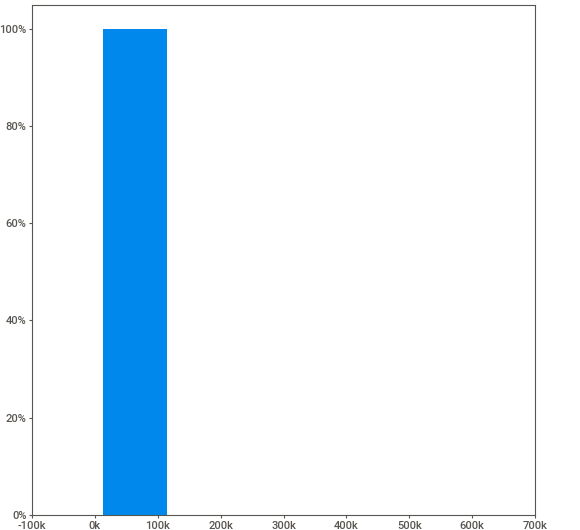
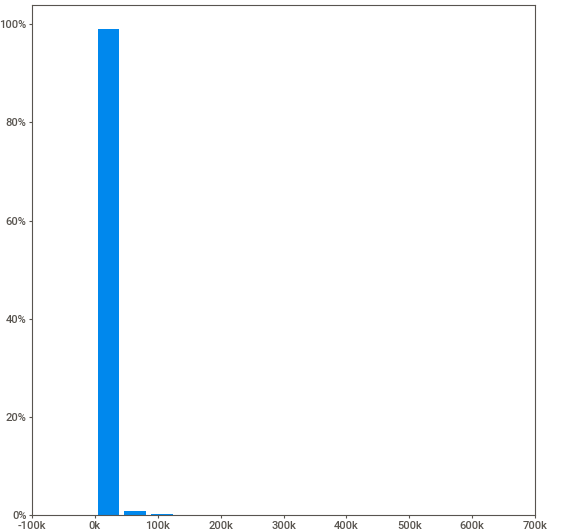
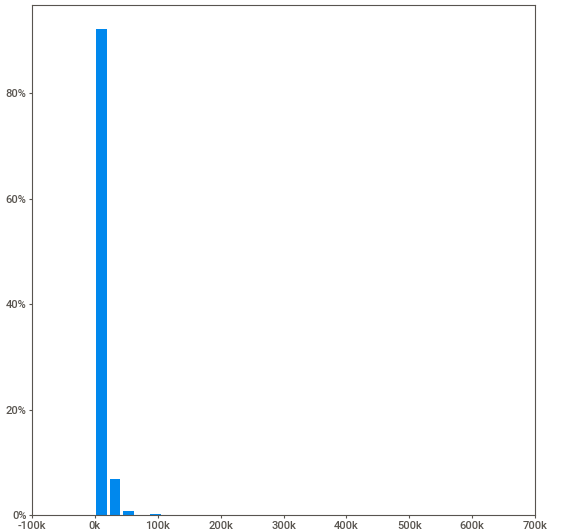
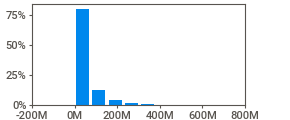
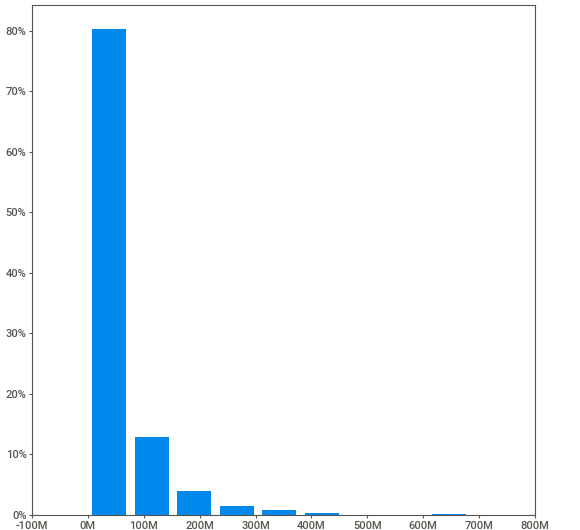
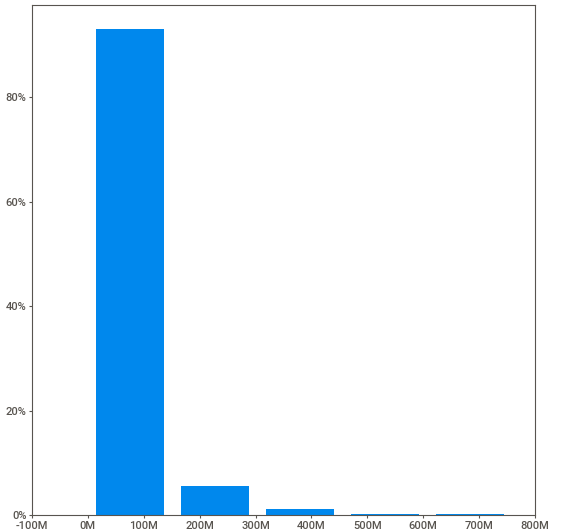
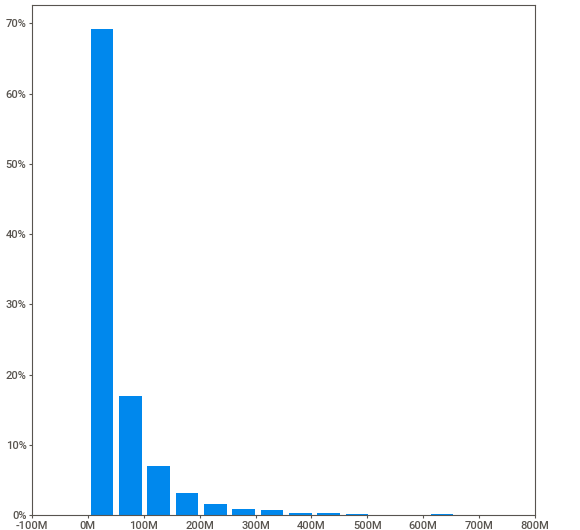
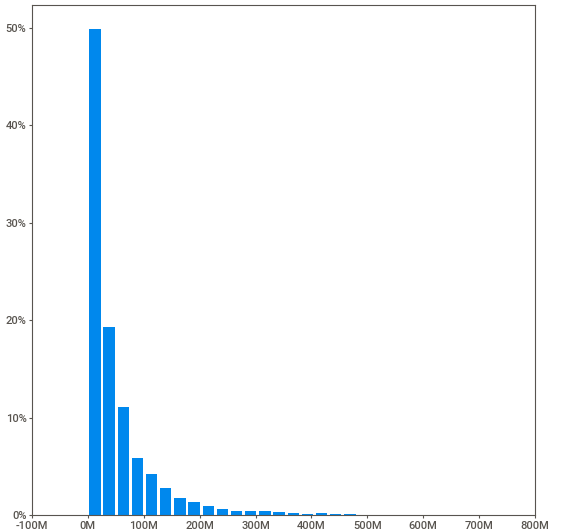
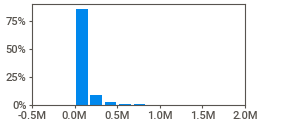
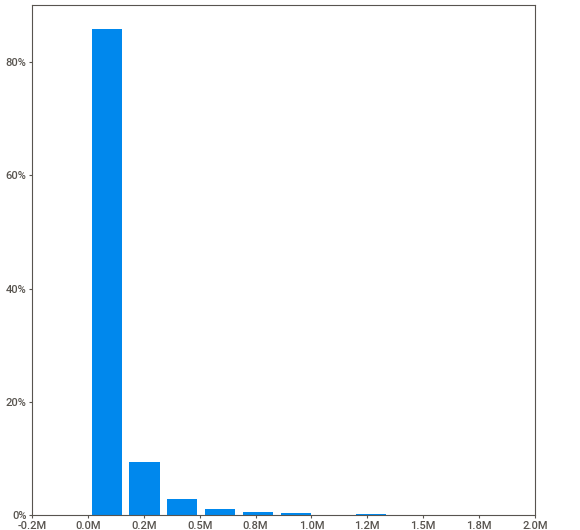
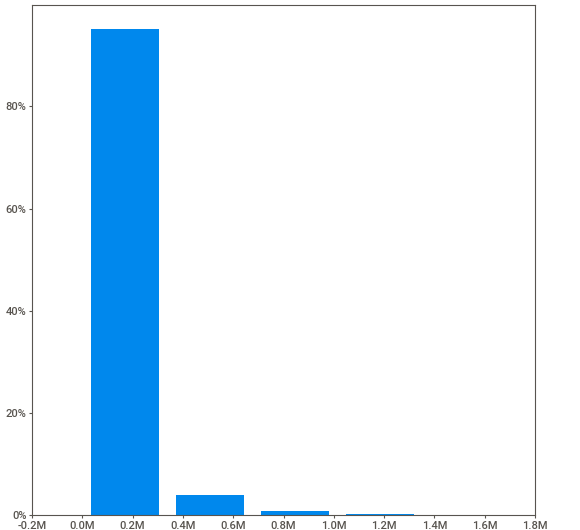
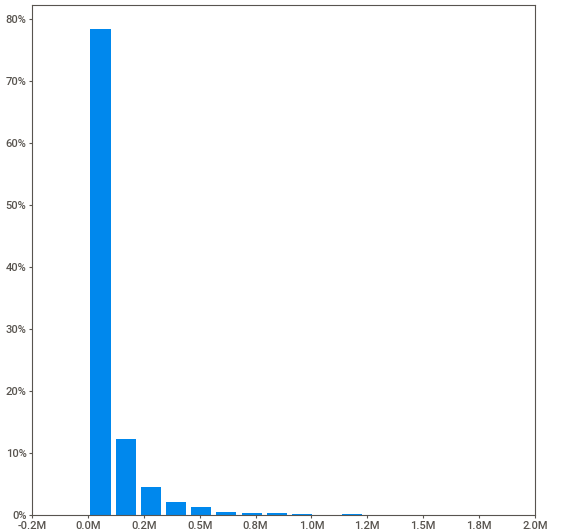
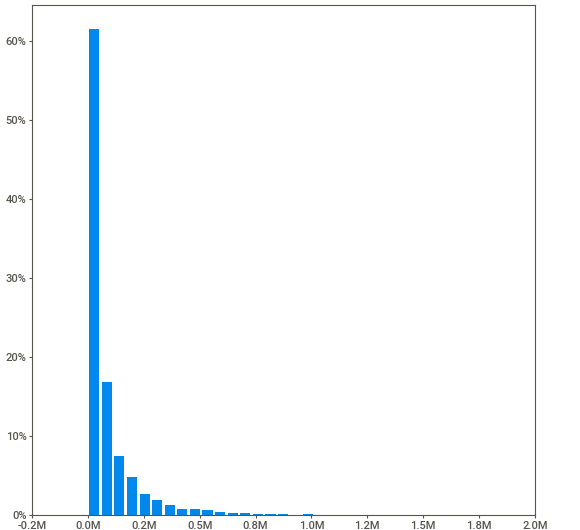
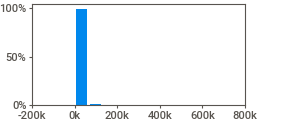
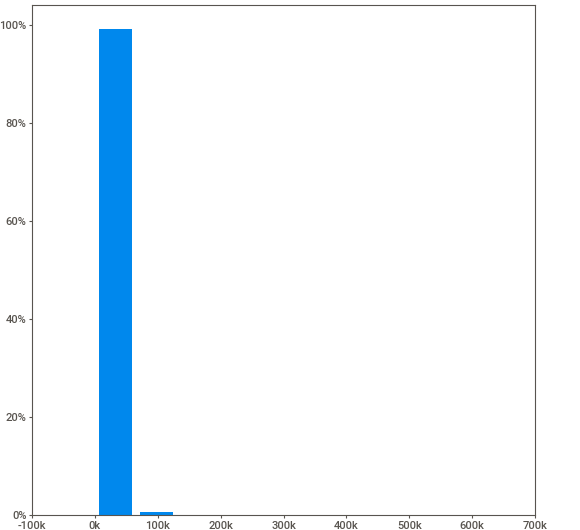
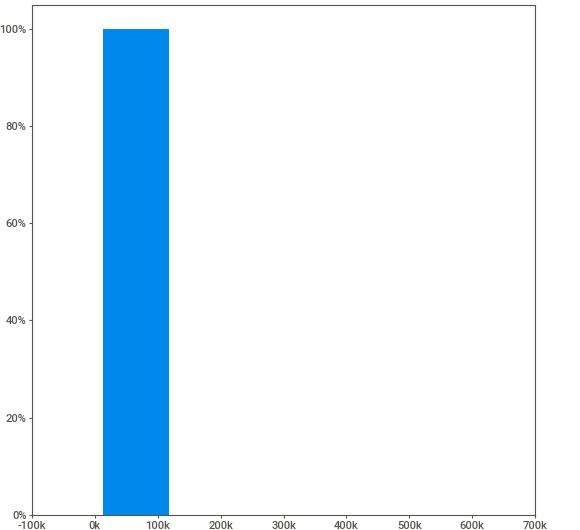
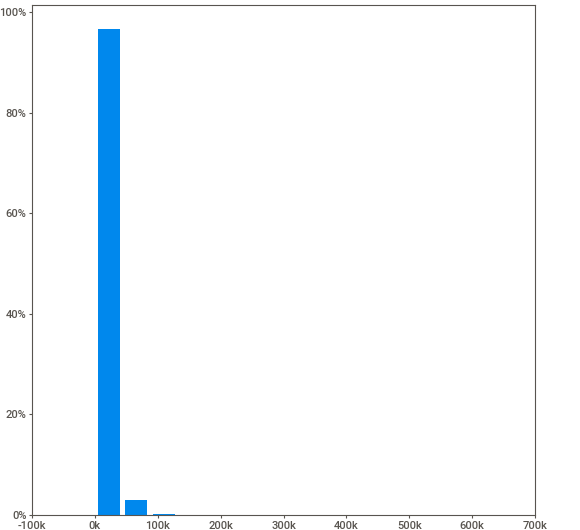
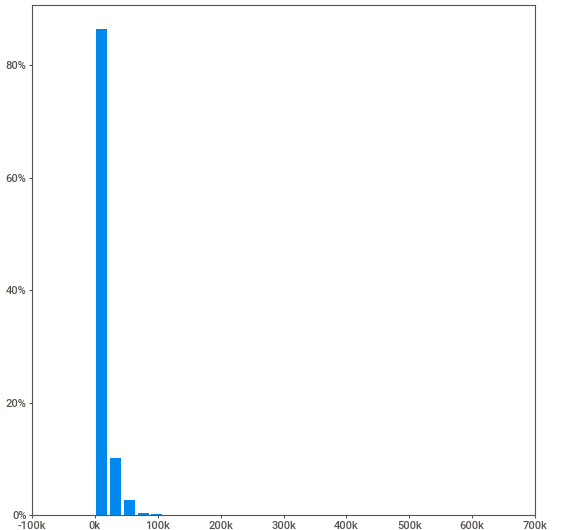
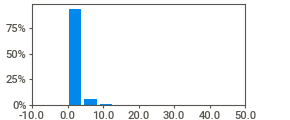
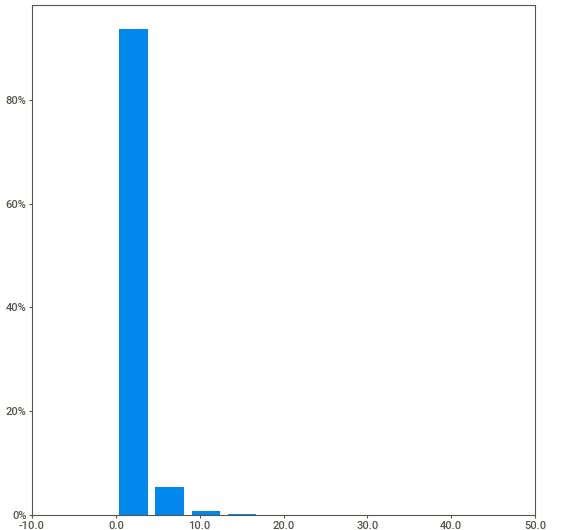
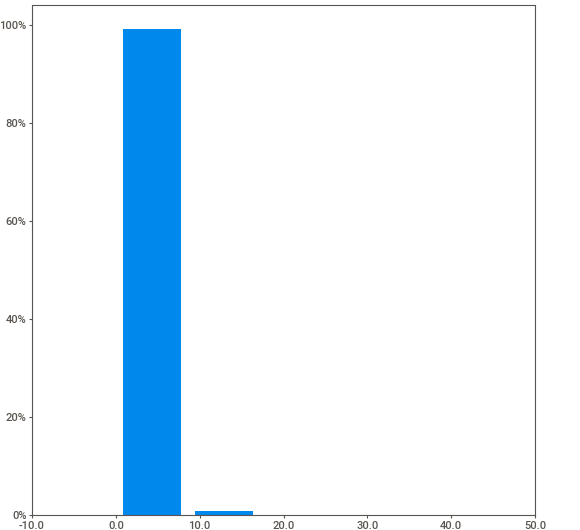
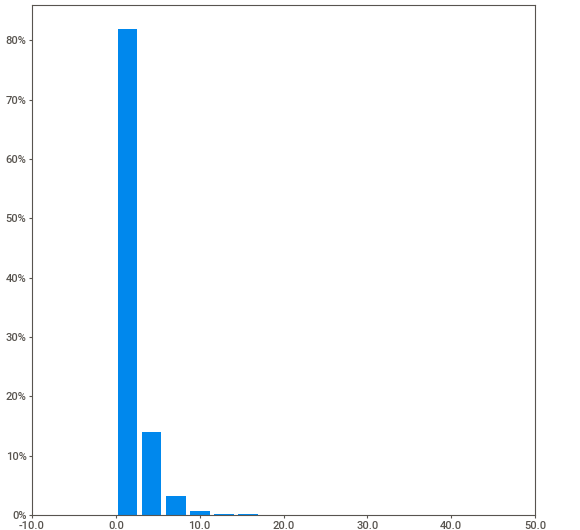
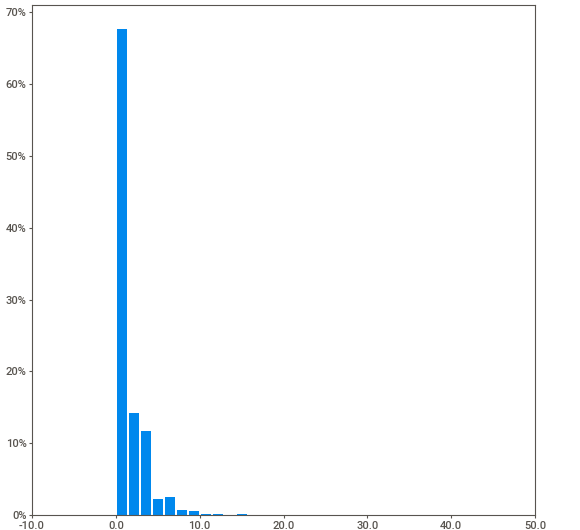
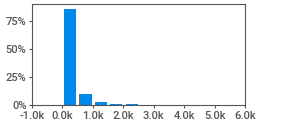
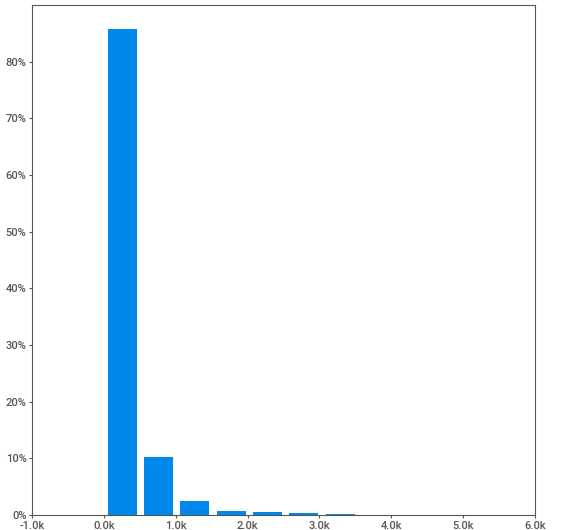
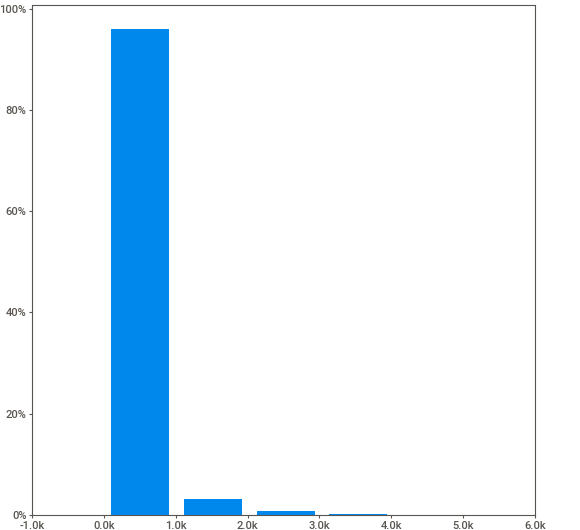
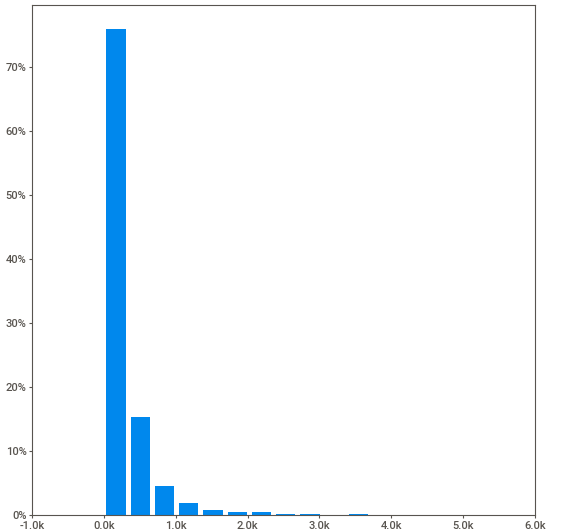
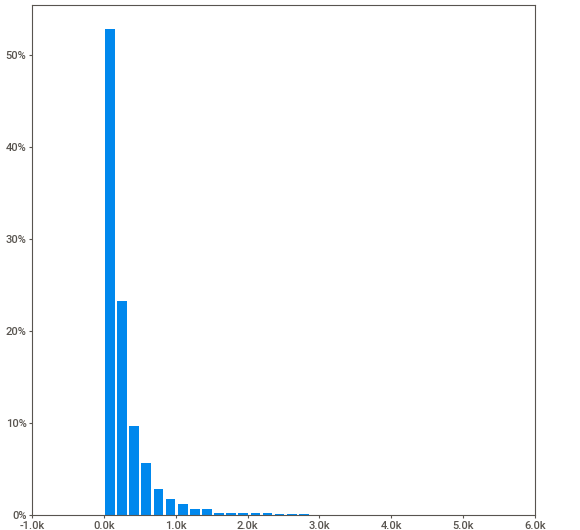
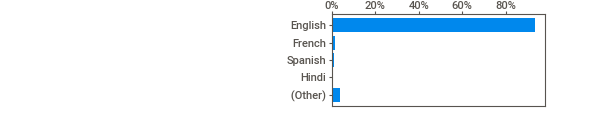
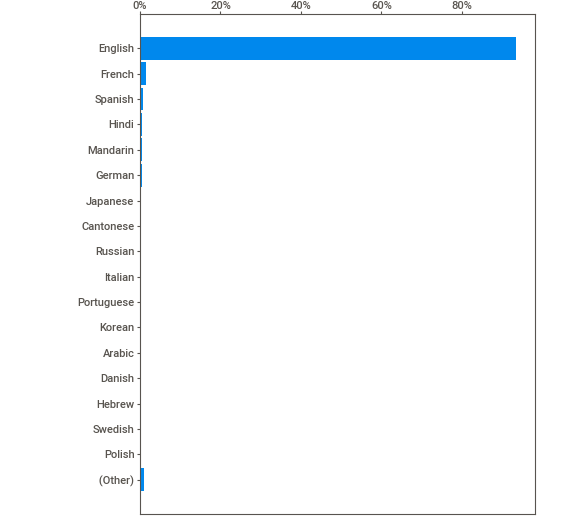
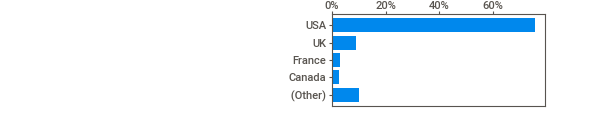
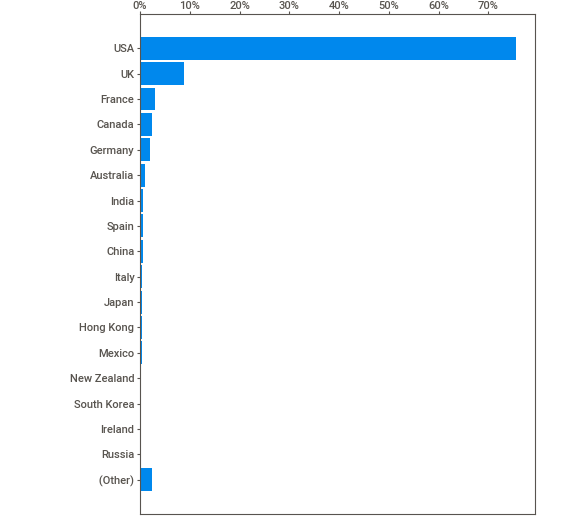
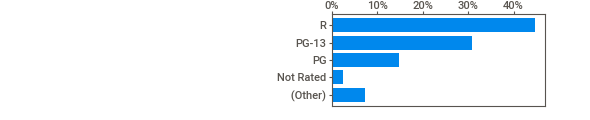
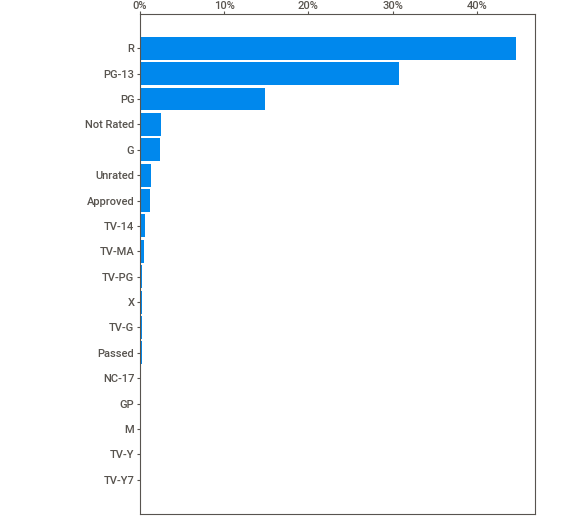
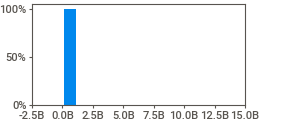
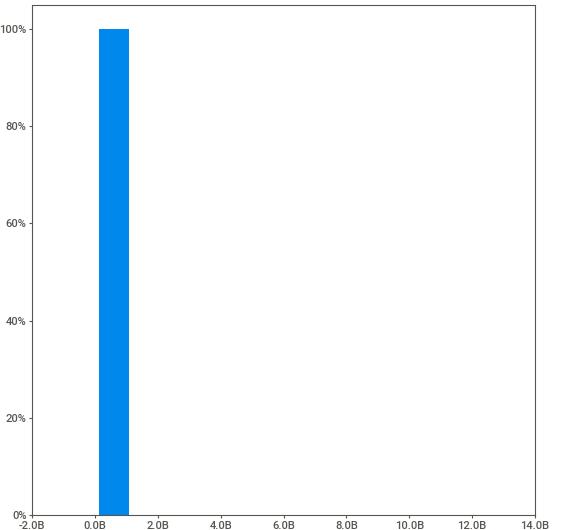
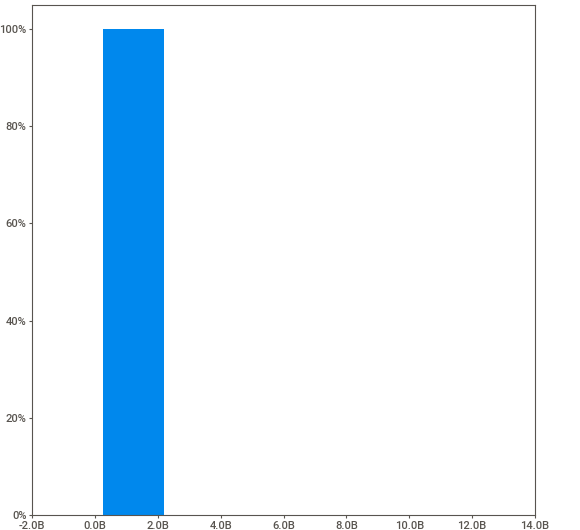
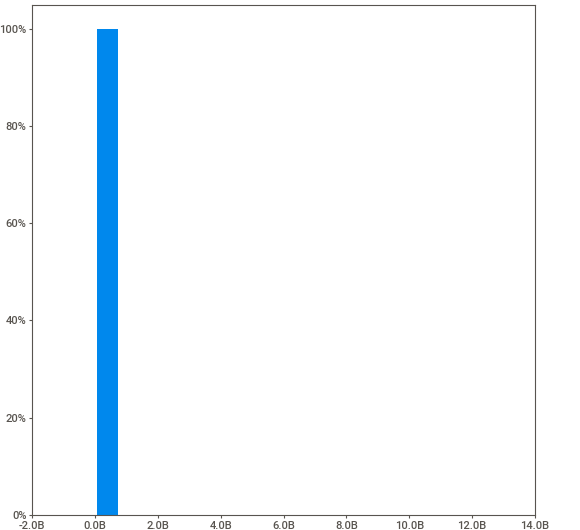
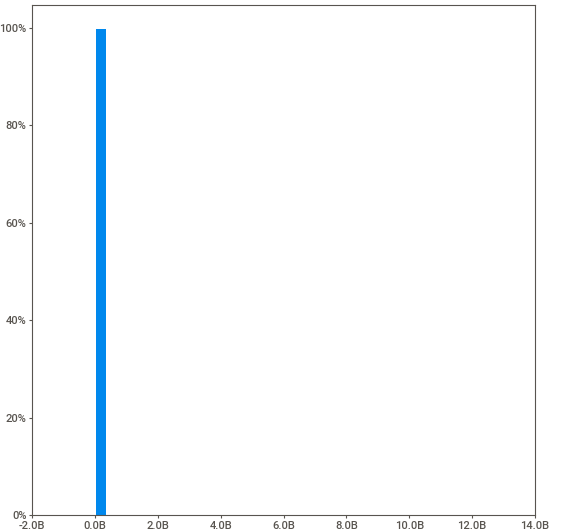
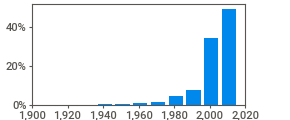
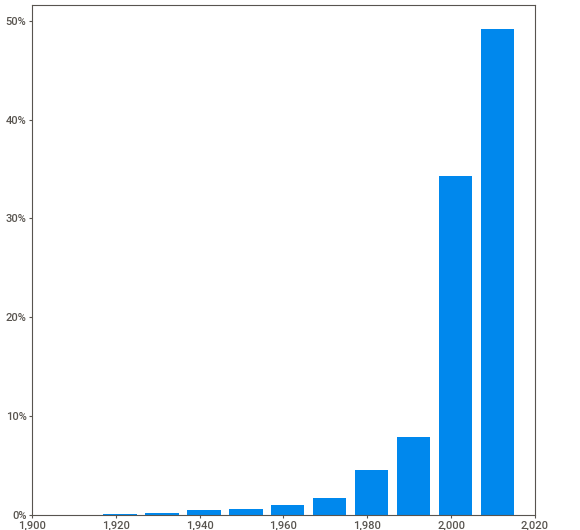
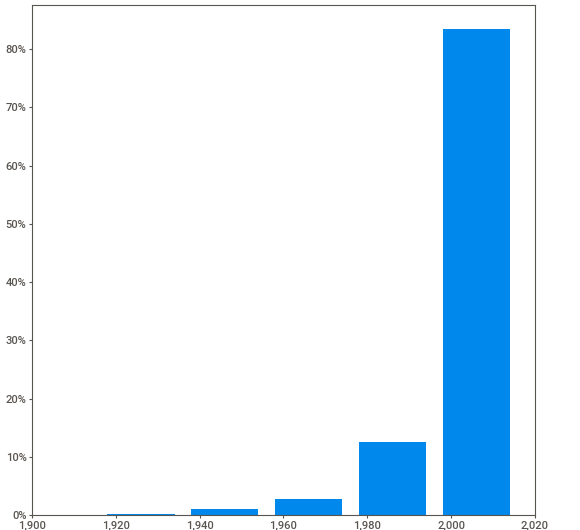
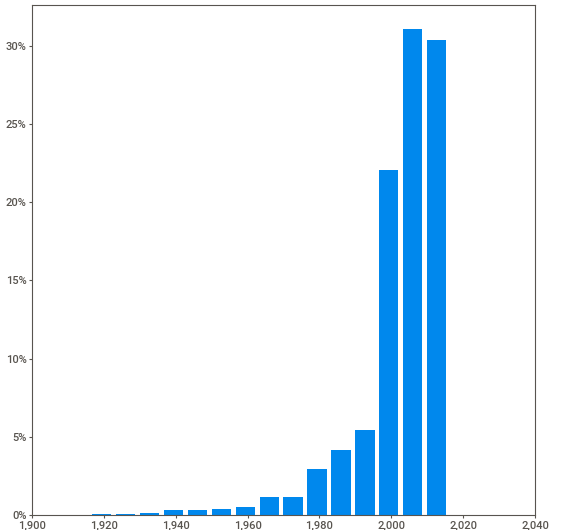
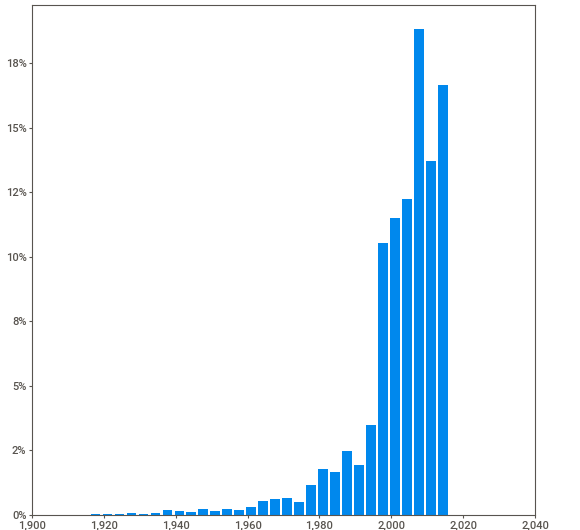
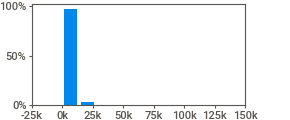
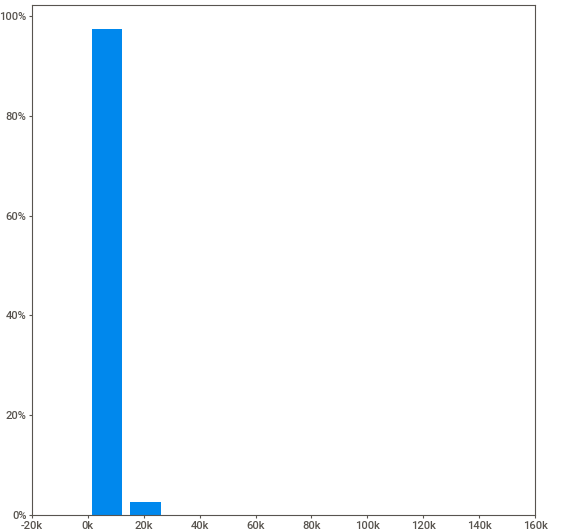
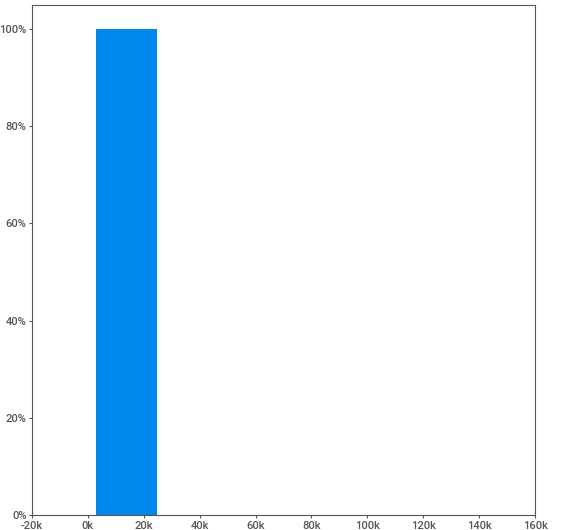
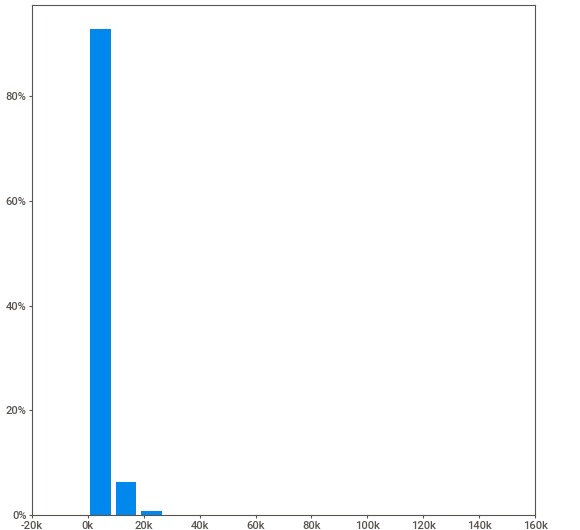
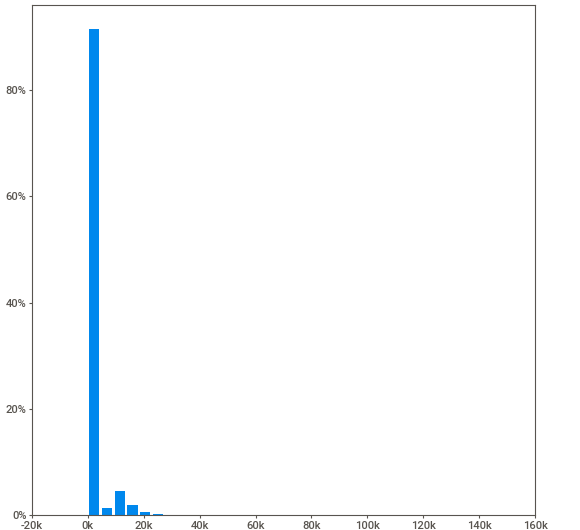
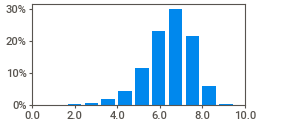
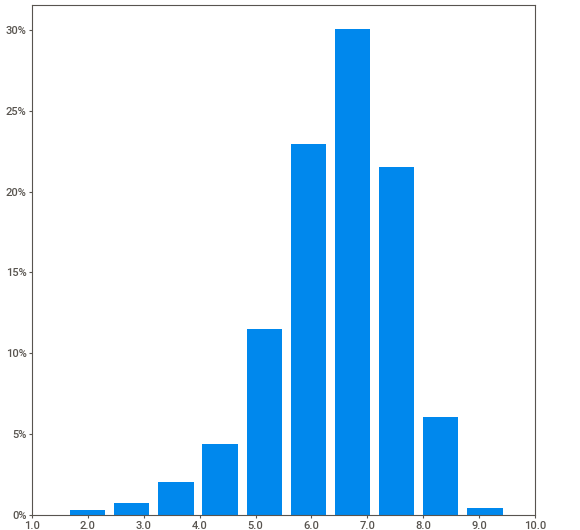
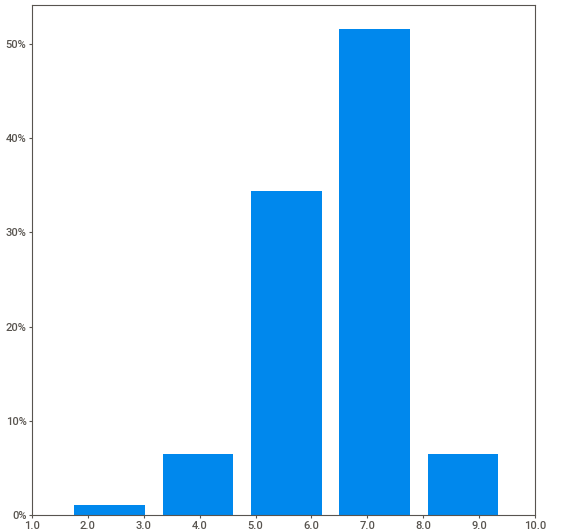
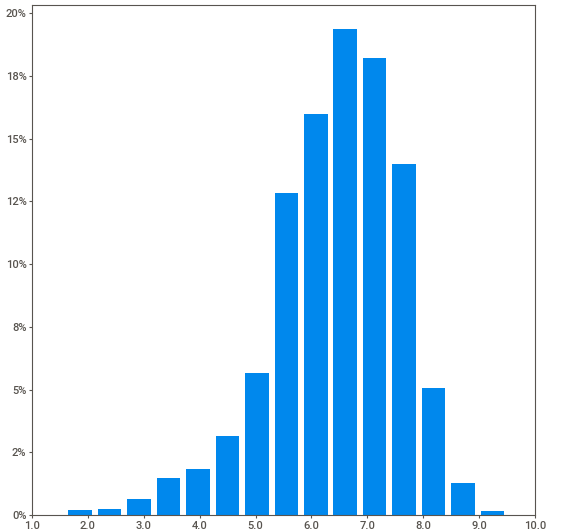
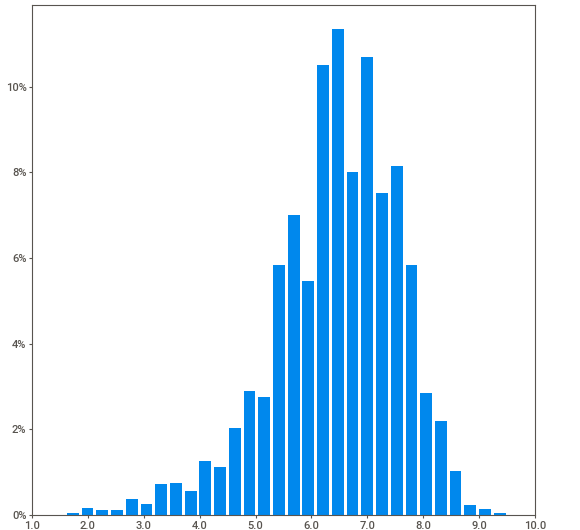
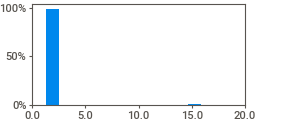
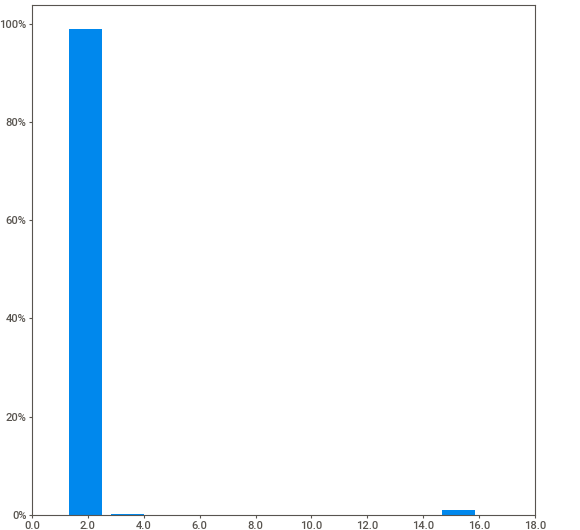
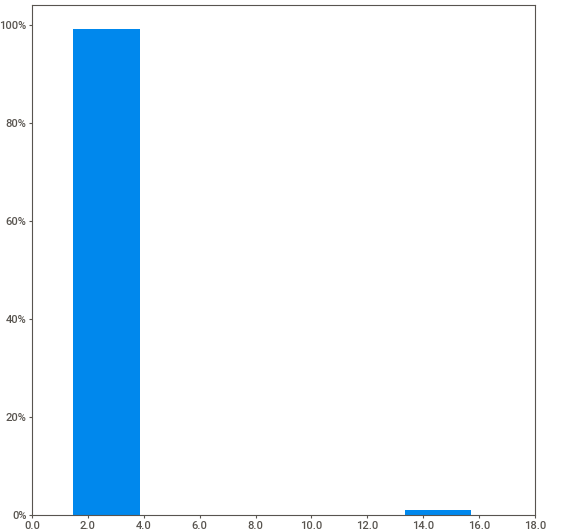
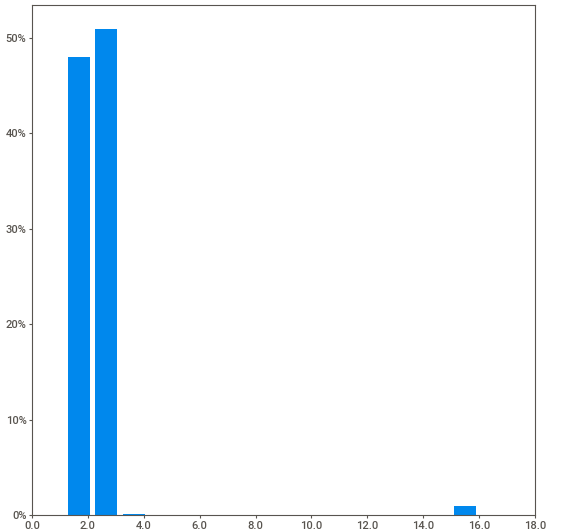
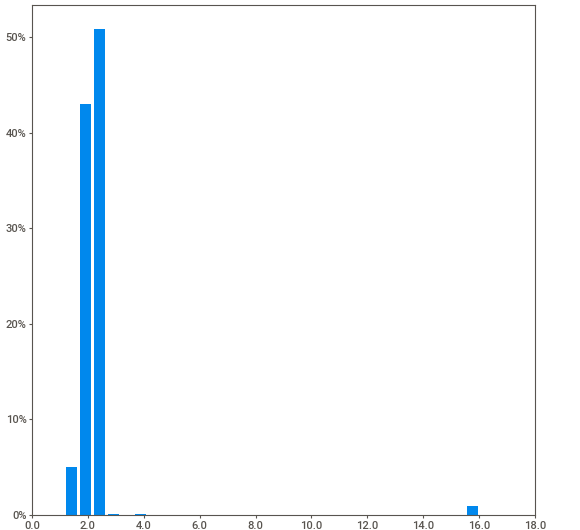
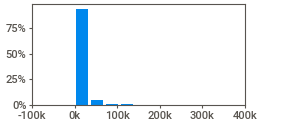
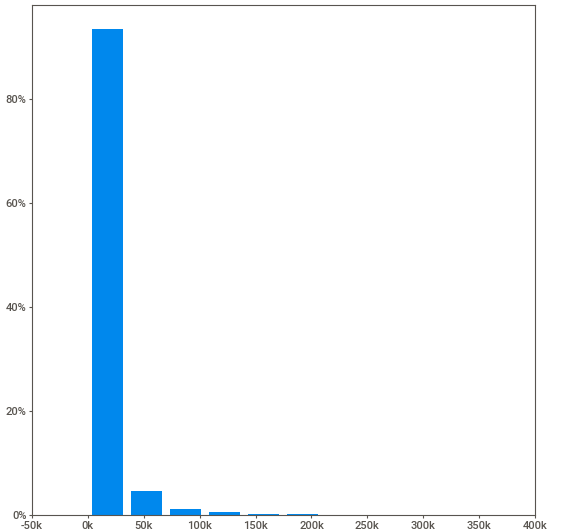
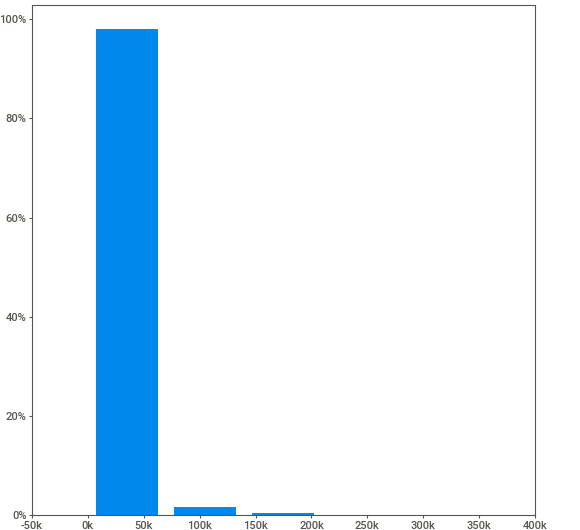
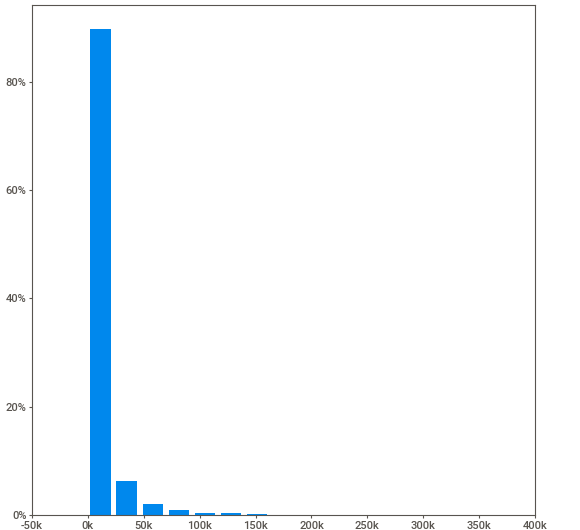
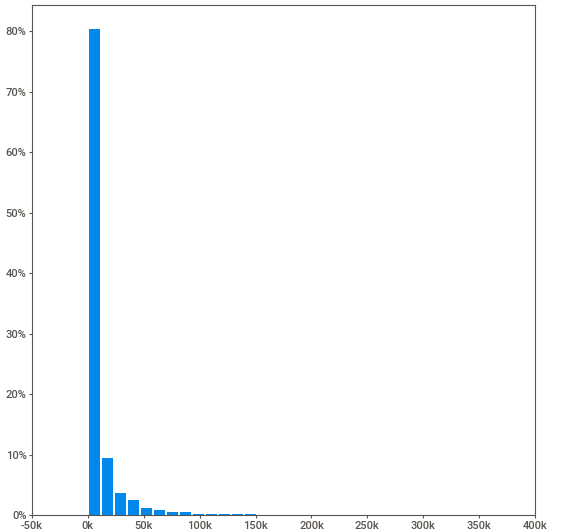
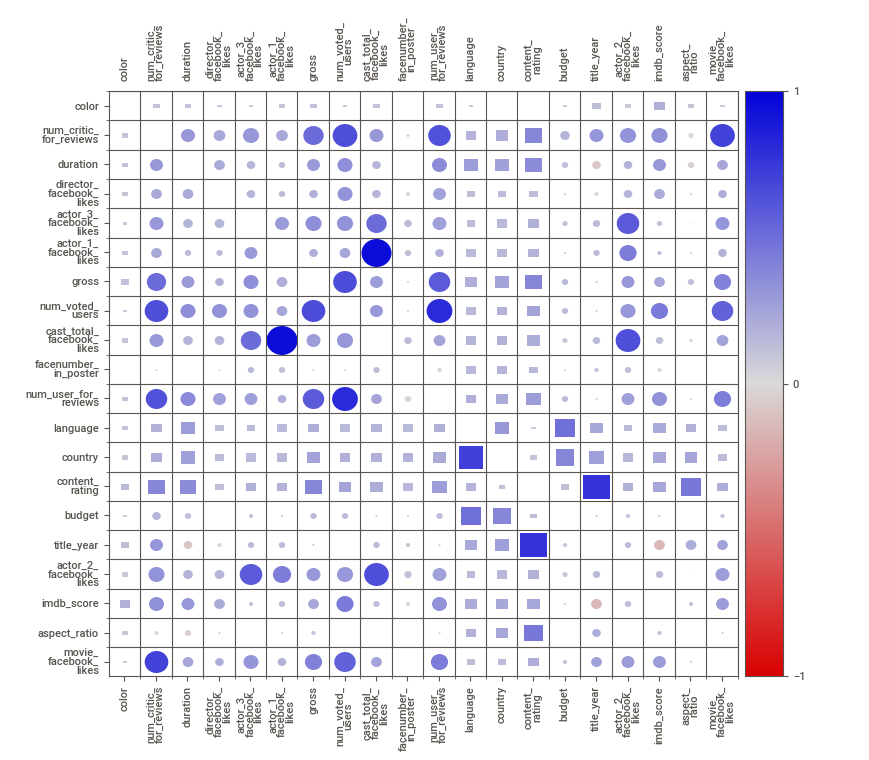
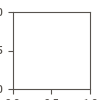

In [ ]:
import sweetviz as sv
report = sv.analyze(df)
report.show_notebook()
#quick , easy and summarized analysis of df

# Data Pre-Proccessing

In [ ]:
df=df.drop(columns=['movie_imdb_link','color','movie_title','facenumber_in_poster', 'plot_keywords',
                    'actor_3_name','movie_imdb_link','aspect_ratio','language','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','actor_2_name','actor_1_name','actor_2_facebook_likes','director_name','title_year','movie_facebook_likes']) #deleting unneccessery columns

In [ ]:
df

,num_critic_for_reviews,duration,gross,genres,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,country,content_rating,budget,imdb_score
0,723.0,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,886204,4834,3054.0,USA,PG-13,237000000.0,7.9
1,302.0,169.0,309404152.0,Action|Adventure|Fantasy,471220,48350,1238.0,USA,PG-13,300000000.0,7.1
2,602.0,148.0,200074175.0,Action|Adventure|Thriller,275868,11700,994.0,UK,PG-13,245000000.0,6.8
3,813.0,164.0,448130642.0,Action|Thriller,1144337,106759,2701.0,USA,PG-13,250000000.0,8.5
4,NaN,NaN,NaN,Documentary,8,143,NaN,NaN,NaN,NaN,7.1
...,...,...,...,...,...,...,...,...,...,...,...
5038,1.0,87.0,NaN,Comedy|Drama,629,2283,6.0,Canada,NaN,NaN,7.7
5039,43.0,43.0,NaN,Crime|Drama|Mystery|Thriller,73839,1753,359.0,USA,TV-14,NaN,7.5
5040,13.0,76.0,NaN,Drama|Horror|Thriller,38,0,3.0,USA,NaN,1400.0,6.3
5041,14.0,100.0,10443.0,Comedy|Drama|Romance,1255,2386,9.0,USA,PG-13,NaN,6.3


In [ ]:
df.isnull().sum()

num_critic_for_reviews        50
duration                      15
gross                        884
genres                         0
num_voted_users                0
cast_total_facebook_likes      0
num_user_for_reviews          21
country                        5
content_rating               303
budget                       492
imdb_score                     0
dtype: int64

In [ ]:
# we will fill nulls in some of column with mean and mode
df['gross'] = df['gross'].fillna(df['gross'].median())
df['budget'] = df['budget'].fillna(df['budget'].median())
df['duration'] = df['duration'].fillna(df['duration'].median())
df['num_critic_for_reviews'] = df['num_critic_for_reviews'].fillna(df['num_critic_for_reviews'].median())
df['num_user_for_reviews'] = df['num_user_for_reviews'].fillna(df['num_user_for_reviews'].median())


df['content_rating'] = df['content_rating'].fillna(df['content_rating'].mode)
df['country'] = df['country'].fillna(df['country'].mode)


In [ ]:
df.isnull().sum()

num_critic_for_reviews       0
duration                     0
gross                        0
genres                       0
num_voted_users              0
cast_total_facebook_likes    0
num_user_for_reviews         0
country                      0
content_rating               0
budget                       0
imdb_score                   0
dtype: int64

In [ ]:
df.shape #we deleted 17 columns

(5043, 11)

In [ ]:
df.dtypes

num_critic_for_reviews       float64
duration                     float64
gross                        float64
genres                        object
num_voted_users                int64
cast_total_facebook_likes      int64
num_user_for_reviews         float64
country                       object
content_rating                object
budget                       float64
imdb_score                   float64
dtype: object

In [ ]:
#lets convert categorical columns into numerical
df= pd.get_dummies(df)

In [ ]:
df.shape

(5043, 1007)

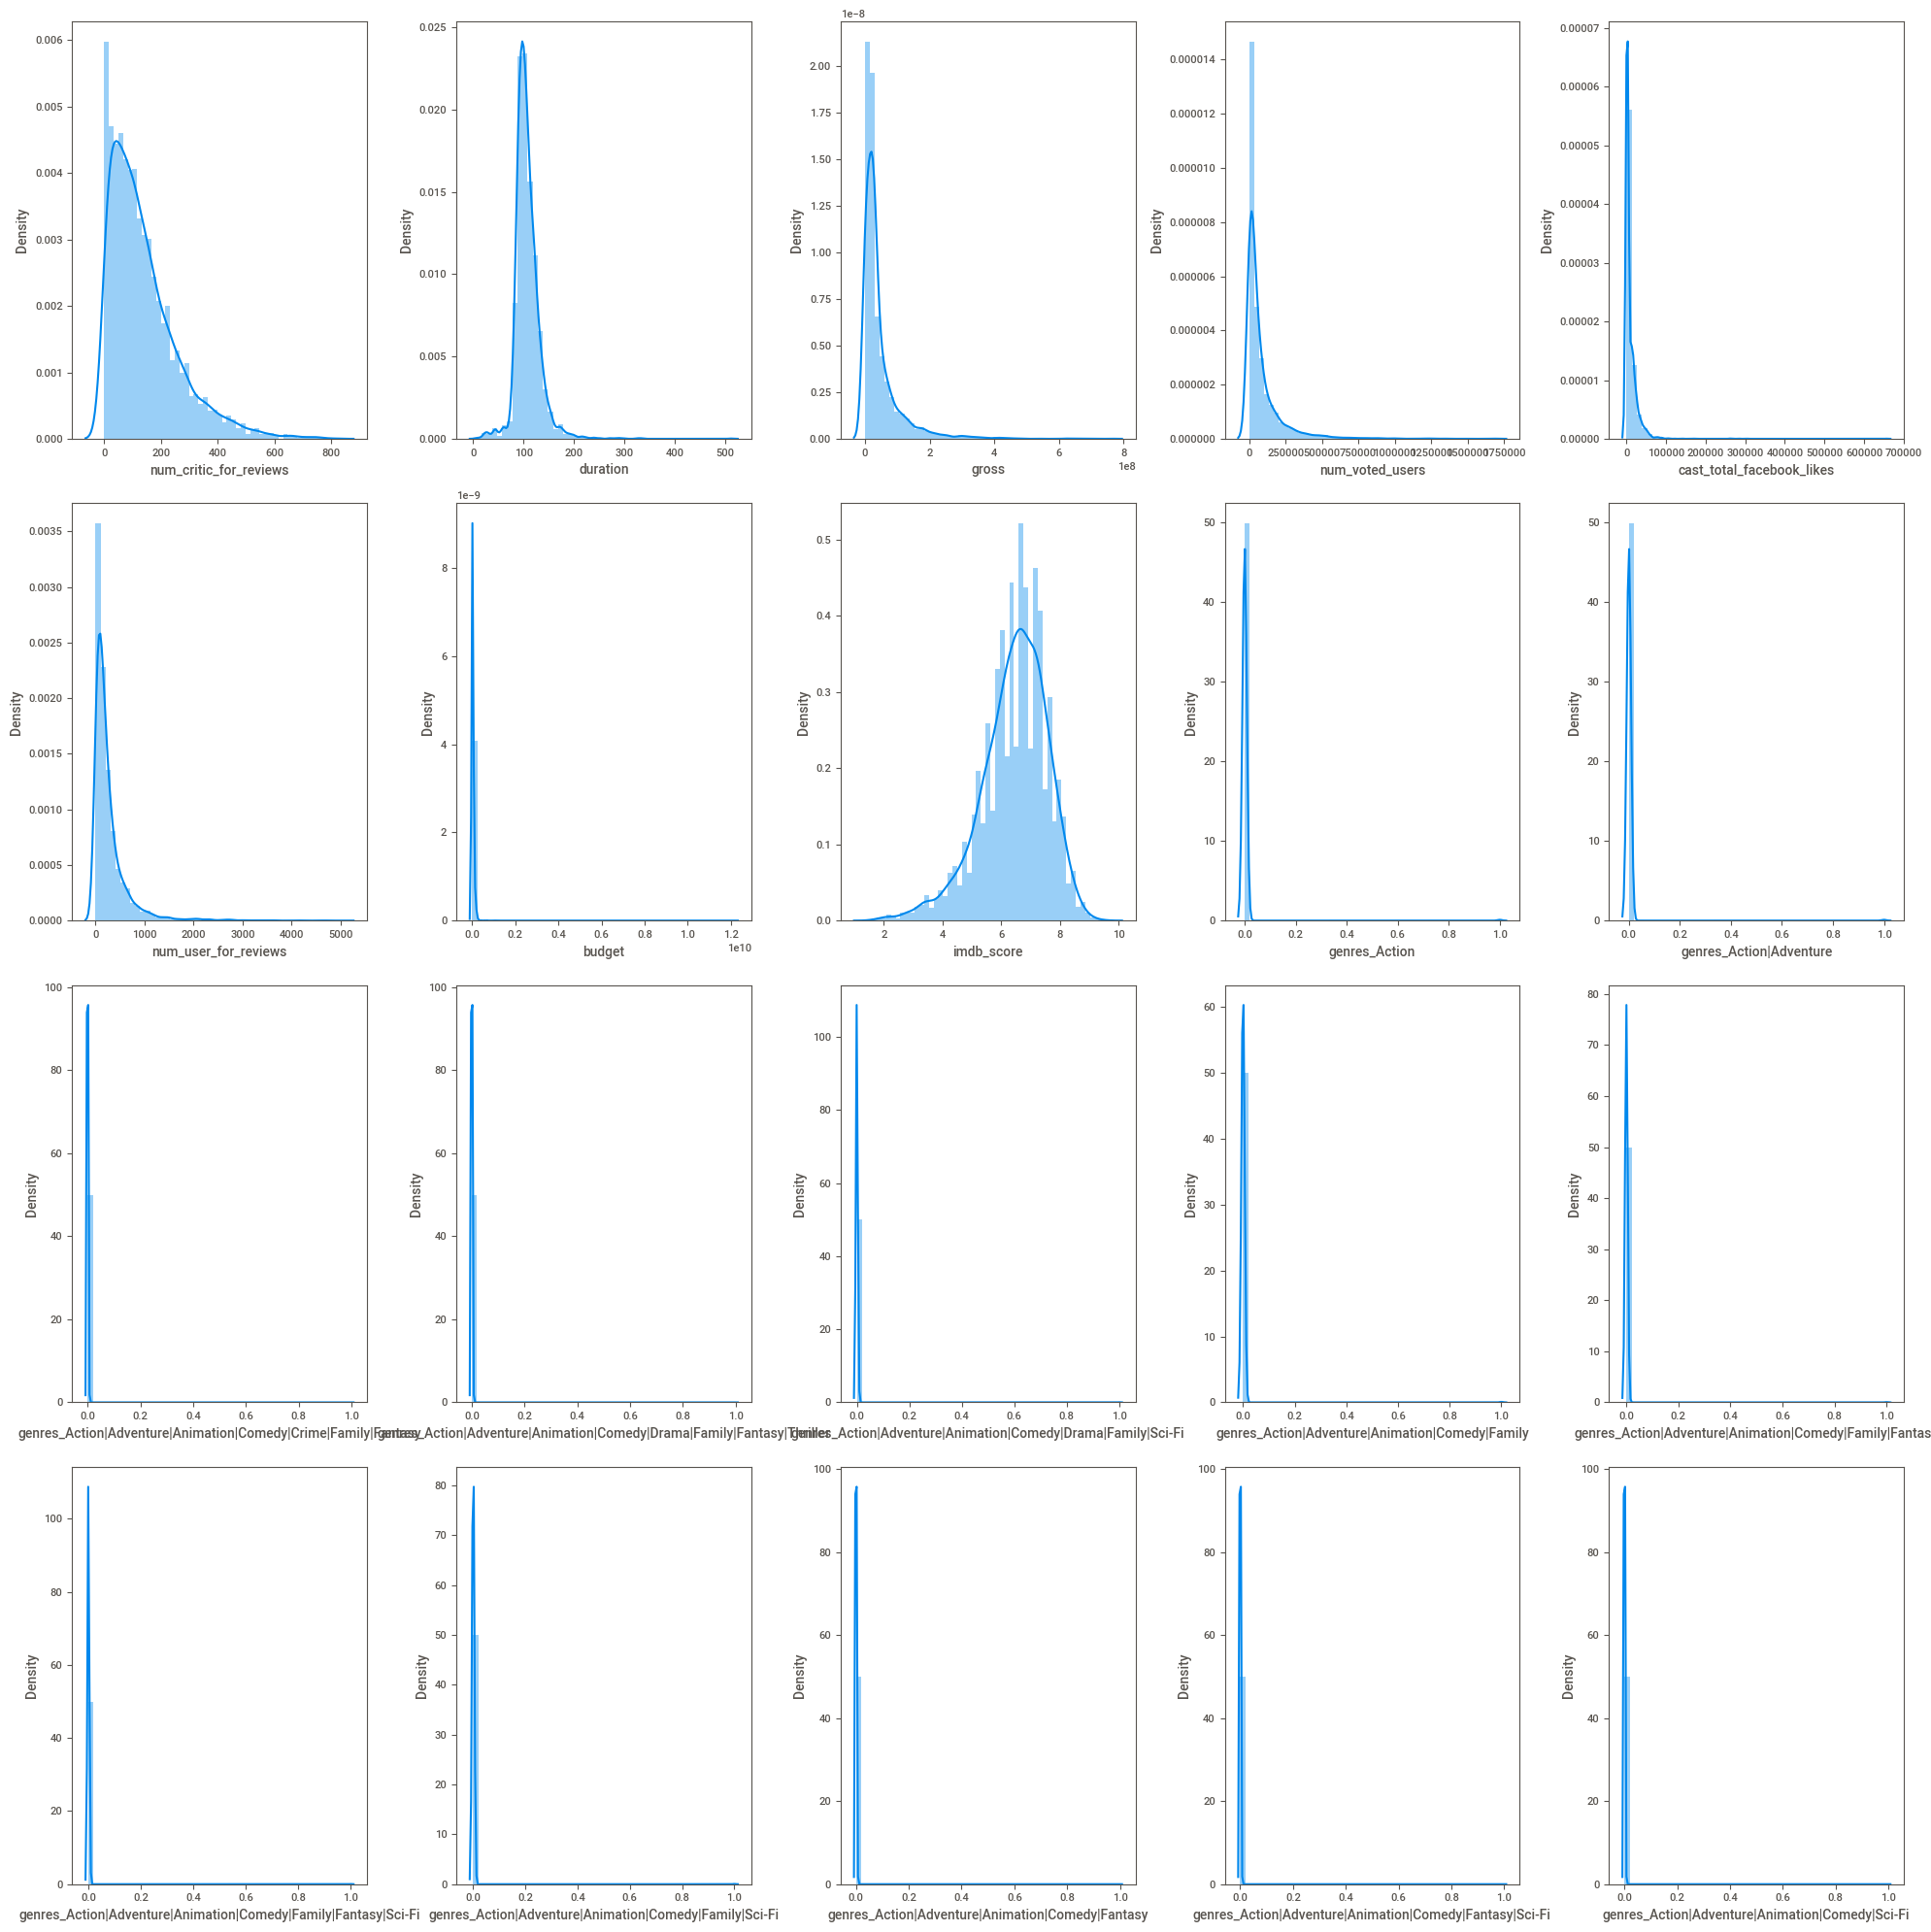

In [ ]:
rows=4
cols=5
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,20))
col=df.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]],ax=ax[i][j])
        index=index+1

plt.tight_layout()
# The distribution plot shows us the overall distribution of the data.

# Buliding A Model

In [ ]:
X=df.drop(labels=['imdb_score'],axis=1)
Y=df['imdb_score']
#difining x,y

In [ ]:
# Train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=40,shuffle=True)

**Now , we apply our Algorithm (GradientBoosting)**

In [ ]:

GB = GradientBoostingRegressor(max_depth=9).fit(X_train, Y_train)

print('-' * 50)
print('Model score on train:', GB.score(X_train, Y_train))
print('Model score on test:', GB.score(X_test, Y_test))



--------------------------------------------------
Model score on train: 0.8820016220999375
Model score on test: 0.5317278366397964
